In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\specti-newaug"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(spectrograms, labels, test_size=0.2, random_state=42)
label_binarizer = LabelBinarizer()
y_train_s = label_binarizer.fit_transform(y_train_s)
y_test_s = label_binarizer.transform(y_test_s)



In [2]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

x4 = Conv2D(256, (3, 3), activation='relu', padding='same')(x3)
x4 = BatchNormalization()(x3)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

x5 = Conv2D(512, (3, 3), activation='relu', padding='same')(x4)
x5 = BatchNormalization()(x3)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)



flatten_layer = Flatten()(x5)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)


x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()






Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 64)         1792      ['input_2[0][0]']             
                                                                                           

Epoch 1/100


105/105 [==============================] - 95s 866ms/step - loss: 2.2585 - accuracy: 0.2956 - val_loss: 6.4959 - val_accuracy: 0.1655
Epoch 2/100
105/105 [==============================] - 109s 1s/step - loss: 1.5360 - accuracy: 0.4666 - val_loss: 1.3442 - val_accuracy: 0.4810
Epoch 3/100
105/105 [==============================] - 104s 991ms/step - loss: 1.0428 - accuracy: 0.6234 - val_loss: 1.0851 - val_accuracy: 0.6369
Epoch 4/100
105/105 [==============================] - 112s 1s/step - loss: 0.6724 - accuracy: 0.7607 - val_loss: 1.3295 - val_accuracy: 0.5393
Epoch 5/100
105/105 [==============================] - 109s 1s/step - loss: 0.3869 - accuracy: 0.8746 - val_loss: 3.1216 - val_accuracy: 0.2321
Epoch 6/100
105/105 [==============================] - 108s 1s/step - loss: 0.2577 - accuracy: 0.9130 - val_loss: 0.3735 - val_accuracy: 0.8869
Epoch 7/100
105/105 [==============================] - 112s 1s/step - loss: 0.1694 - accuracy: 0.9440 - val_loss: 0.8126 - val_ac

C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: C:\Users\adwit\Downloads\cnn_models\test02spectronewest.h5
27/27 [==============================] - 9s 327ms/step
Accuracy: 0.9845238095238096
Average Precision: 0.9849652209265061
Average Recall: 0.9845238095238096
Average F1-score: 0.9846419845127987


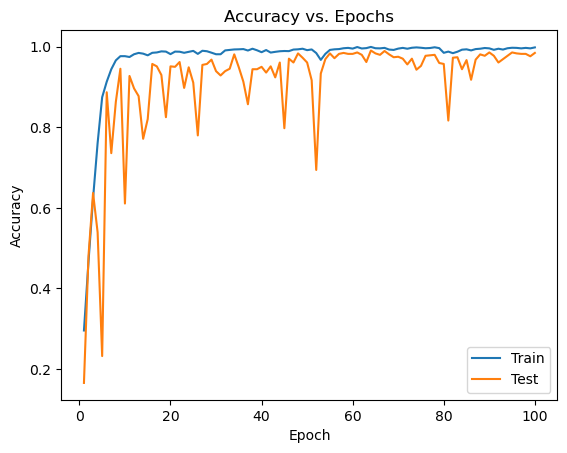

In [3]:
# Train the model
history = model.fit([X_train, X_train], y_train, batch_size=32, epochs=100, validation_data=([X_test, X_test], y_test))
from tensorflow.keras.models import save_model

model_path = r"C:\Users\adwit\Downloads\cnn_models\test02spectronewest.h5" 
model.save(model_path)

print("Model saved successfully at:", model_path)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict([X_test, X_test])  
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


In [3]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

chromagrams = []
labels = []

for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(224,224,3))
            img_array = img_to_array(img)
            chromagrams.append(img_array)
            labels.append(emotion_category)

chromagrams = np.array(chromagrams)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(chromagrams, labels, test_size=0.1, random_state=42)

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [4]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x4 = BatchNormalization()(x3)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

x5 = Conv2D(256, (3, 3), activation='relu', padding='same')(x4)
x5 = BatchNormalization()(x3)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)


x6 = Conv2D(512, (3, 3), activation='relu', padding='same')(x3)
x6 = BatchNormalization()(x3)
x6 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)


flatten_layer = Flatten()(x6)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 128, 128, 32)         896       ['input_3[0][0]']             
                                                                                                  
 conv2d_6 (Conv2D)           (None, 128, 128, 64)         1792      ['input_4[0][0]']             
                                                                                            

Epoch 1/100


105/105 [==============================] - 54s 443ms/step - loss: 2.3155 - accuracy: 0.2101 - val_loss: 4.7882 - val_accuracy: 0.1310
Epoch 2/100
105/105 [==============================] - 49s 465ms/step - loss: 1.8384 - accuracy: 0.3278 - val_loss: 2.4077 - val_accuracy: 0.1690
Epoch 3/100
105/105 [==============================] - 48s 457ms/step - loss: 1.4976 - accuracy: 0.4422 - val_loss: 1.9870 - val_accuracy: 0.3274
Epoch 4/100
105/105 [==============================] - 62s 593ms/step - loss: 1.1149 - accuracy: 0.5861 - val_loss: 4.2123 - val_accuracy: 0.1857
Epoch 5/100
105/105 [==============================] - 62s 587ms/step - loss: 0.7580 - accuracy: 0.7247 - val_loss: 1.1086 - val_accuracy: 0.6167
Epoch 6/100
105/105 [==============================] - 62s 593ms/step - loss: 0.4741 - accuracy: 0.8406 - val_loss: 1.0027 - val_accuracy: 0.6988
Epoch 7/100
105/105 [==============================] - 57s 544ms/step - loss: 0.3233 - accuracy: 0.8909 - val_loss: 0.3960

C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: C:\Users\adwit\Downloads\cnn_models\test02CHROMAcomplex.h5
27/27 [==============================] - 9s 219ms/step
Accuracy: 0.9797348906783217
Average Precision: 0.9799812621290999
Average Recall: 0.9797356892761099
Average F1-score: 0.9798782003033975


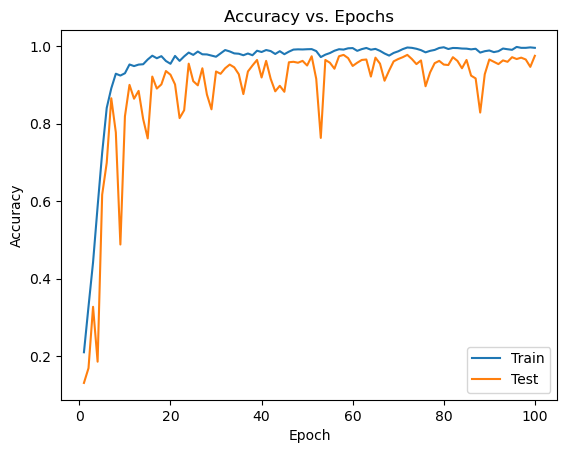

In [3]:
# Train the model
history = model.fit([X_train, X_train], y_train, batch_size=32, epochs=100, validation_data=([X_test, X_test], y_test))
from tensorflow.keras.models import save_model

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02CHROMAcomplex.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test, X_test])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


In [4]:
# Train the model
model.fit([X_train_s1, X_train_s1], y_train_s1, batch_size=32, epochs=100, validation_data=([X_test_s1, X_test_s1], y_test_s1))

Epoch 1/100


105/105 [==============================] - 144s 1s/step - loss: 2.3883 - accuracy: 0.2810 - val_loss: 3.5696 - val_accuracy: 0.1631
Epoch 2/100
105/105 [==============================] - 128s 1s/step - loss: 1.6206 - accuracy: 0.4499 - val_loss: 1.5529 - val_accuracy: 0.4357
Epoch 3/100
105/105 [==============================] - 118s 1s/step - loss: 1.2231 - accuracy: 0.5703 - val_loss: 1.4562 - val_accuracy: 0.4595
Epoch 4/100
105/105 [==============================] - 129s 1s/step - loss: 0.8360 - accuracy: 0.7056 - val_loss: 1.2549 - val_accuracy: 0.5405
Epoch 5/100
105/105 [==============================] - 138s 1s/step - loss: 0.5575 - accuracy: 0.8057 - val_loss: 1.1911 - val_accuracy: 0.5667
Epoch 6/100
105/105 [==============================] - 121s 1s/step - loss: 0.3642 - accuracy: 0.8716 - val_loss: 0.7613 - val_accuracy: 0.7274
Epoch 7/100
105/105 [==============================] - 119s 1s/step - loss: 0.2196 - accuracy: 0.9279 - val_loss: 0.3739 - val_accurac

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test_s1, X_test_s1])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_s1, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_s1, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_s1, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_s1, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)


27/27 [==============================] - 5s 168ms/step
Accuracy: 0.9809523809523809
Average Precision: 0.9816941508746355
Average Recall: 0.9809523809523809
Average F1-score: 0.9809929454755242


In [3]:
# Train the model
model.fit([X_train_s1, X_train_s1], y_train_s1, batch_size=32, epochs=50, validation_data=([X_test_s1, X_test_s1], y_test_s1))

Epoch 1/50


105/105 [==============================] - 397s 3s/step - loss: 1.7793 - accuracy: 0.4091 - val_loss: 1.9447 - val_accuracy: 0.3655
Epoch 2/50
105/105 [==============================] - 331s 3s/step - loss: 0.9268 - accuracy: 0.6684 - val_loss: 1.7389 - val_accuracy: 0.4321
Epoch 3/50
105/105 [==============================] - 315s 3s/step - loss: 0.6403 - accuracy: 0.7816 - val_loss: 0.9603 - val_accuracy: 0.6440
Epoch 4/50
105/105 [==============================] - 293s 3s/step - loss: 0.2830 - accuracy: 0.9085 - val_loss: 1.5149 - val_accuracy: 0.5095
Epoch 5/50
105/105 [==============================] - 300s 3s/step - loss: 0.1018 - accuracy: 0.9723 - val_loss: 0.6699 - val_accuracy: 0.7940
Epoch 6/50
105/105 [==============================] - 326s 3s/step - loss: 0.0763 - accuracy: 0.9785 - val_loss: 1.0188 - val_accuracy: 0.6810
Epoch 7/50
105/105 [==============================] - 353s 3s/step - loss: 0.0627 - accuracy: 0.9818 - val_loss: 0.2140 - val_accuracy: 0.93

In [14]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout

input_shape = (256,256, 3)

# First Input and Convolutional Block
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

# Second Input and Convolutional Block
input_layer2 = Input(shape=input_shape)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

# Concatenation
concatenated_input = Concatenate()([x1, x2])

# Third Convolutional Block
x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

# Flatten and Dense Layers
flatten_layer = Flatten()(x3)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

# Output layer
num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Model definition and compilation
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 128, 128, 32)         896       ['input_3[0][0]']             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 128, 128, 128)        3584      ['input_4[0][0]']             
                                                                                            

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test_s1,X_test_s1])  # Example of getting predictions, adjust according to your model

# Calculate confusion matrix as before
cm = confusion_matrix(np.argmax(y_test_s1, axis=1), np.argmax(y_pred, axis=1))


print(cm)


14/14 [==============================] - 2s 154ms/step
[[20  2  0  0  0  4 10  0]
 [25  2  0  0  0  2 31  0]
 [13  0  0  0  0  2 32  0]
 [33  1  0  0  0  0 28  3]
 [20  0  0  0  0  1 30  1]
 [13  1  0  0  0  5 33  1]
 [18  2  0  0  0  1 20  0]
 [22  2  0  0  0  6 36  0]]


In [10]:
from sklearn.metrics import classification_report

# Assuming you have true labels y_test_s1 and predicted labels y_pred
print(classification_report(np.argmax(y_test_s1, axis=1), np.argmax(y_pred, axis=1), target_names=label_binarizer.classes_))


              precision    recall  f1-score   support

           1       0.12      0.56      0.20        36
           2       0.20      0.03      0.06        60
           3       0.00      0.00      0.00        47
           4       0.00      0.00      0.00        65
           5       0.00      0.00      0.00        52
           6       0.24      0.09      0.14        53
           7       0.09      0.49      0.15        41
           8       0.00      0.00      0.00        66

    accuracy                           0.11       420
   macro avg       0.08      0.15      0.07       420
weighted avg       0.08      0.11      0.06       420



C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
# Train the model
model.fit([X_train_s1, X_train_s1], y_train_s1, batch_size=32, epochs=50, validation_data=([X_test_s1, X_test_s1], y_test_s1))

Epoch 1/50
105/105 [==============================] - 359s 3s/step - loss: 1.9381 - accuracy: 0.3576 - val_loss: 10.5484 - val_accuracy: 0.1214
Epoch 2/50
105/105 [==============================] - 275s 3s/step - loss: 1.1753 - accuracy: 0.5888 - val_loss: 1.5377 - val_accuracy: 0.4619
Epoch 3/50
105/105 [==============================] - 275s 3s/step - loss: 0.7018 - accuracy: 0.7503 - val_loss: 1.2611 - val_accuracy: 0.5131
Epoch 4/50
105/105 [==============================] - 284s 3s/step - loss: 0.3853 - accuracy: 0.8754 - val_loss: 1.4375 - val_accuracy: 0.5750
Epoch 5/50
105/105 [==============================] - 290s 3s/step - loss: 0.3016 - accuracy: 0.8921 - val_loss: 0.7049 - val_accuracy: 0.7702
Epoch 6/50
105/105 [==============================] - 287s 3s/step - loss: 0.1795 - accuracy: 0.9410 - val_loss: 1.1020 - val_accuracy: 0.6571
Epoch 7/50
105/105 [==============================] - 284s 3s/step - loss: 0.1075 - accuracy: 0.9648 - val_loss: 0.1656 - val_accuracy: 0.947

In [3]:
# Train the model
model.fit([X_train_s1, X_train_s1], y_train_s1, batch_size=32, epochs=100, validation_data=([X_test_s1, X_test_s1], y_test_s1))

Epoch 1/100


105/105 [==============================] - 98s 897ms/step - loss: 2.0758 - accuracy: 0.3379 - val_loss: 6.3431 - val_accuracy: 0.1274
Epoch 2/100
105/105 [==============================] - 120s 1s/step - loss: 1.3186 - accuracy: 0.5390 - val_loss: 1.2355 - val_accuracy: 0.5286
Epoch 3/100
105/105 [==============================] - 161s 2s/step - loss: 0.8632 - accuracy: 0.6913 - val_loss: 1.3432 - val_accuracy: 0.4750
Epoch 4/100
105/105 [==============================] - 157s 1s/step - loss: 0.5669 - accuracy: 0.8033 - val_loss: 2.1942 - val_accuracy: 0.4250
Epoch 5/100
105/105 [==============================] - 178s 2s/step - loss: 0.3498 - accuracy: 0.8796 - val_loss: 0.7825 - val_accuracy: 0.7071
Epoch 6/100
105/105 [==============================] - 134s 1s/step - loss: 0.1997 - accuracy: 0.9318 - val_loss: 0.5510 - val_accuracy: 0.8131
Epoch 7/100
105/105 [==============================] - 131s 1s/step - loss: 0.2033 - accuracy: 0.9303 - val_loss: 2.2707 - val_accur

0.4 droput

In [15]:
# Train the model
model.fit([X_train_s1, X_train_s1], y_train_s1, batch_size=32, epochs=100, validation_data=([X_test_s1, X_test_s1], y_test_s1))

Epoch 1/100


118/118 [==============================] - 101s 816ms/step - loss: 2.0730 - accuracy: 0.3411 - val_loss: 3.4755 - val_accuracy: 0.1857
Epoch 2/100
118/118 [==============================] - 141s 1s/step - loss: 1.2247 - accuracy: 0.5861 - val_loss: 1.1753 - val_accuracy: 0.5524
Epoch 3/100
118/118 [==============================] - 124s 1s/step - loss: 0.7373 - accuracy: 0.7389 - val_loss: 1.7618 - val_accuracy: 0.4667
Epoch 4/100
118/118 [==============================] - 121s 1s/step - loss: 0.4478 - accuracy: 0.8395 - val_loss: 0.8853 - val_accuracy: 0.7310
Epoch 5/100
118/118 [==============================] - 123s 1s/step - loss: 0.4004 - accuracy: 0.8581 - val_loss: 0.8400 - val_accuracy: 0.7238
Epoch 6/100
118/118 [==============================] - 118s 1000ms/step - loss: 0.2091 - accuracy: 0.9264 - val_loss: 0.3922 - val_accuracy: 0.8571
Epoch 7/100
118/118 [==============================] - 122s 1s/step - loss: 0.1120 - accuracy: 0.9685 - val_loss: 1.5740 - val_

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test_s1,X_test_s1])  # Example of getting predictions, adjust according to your model

# Calculate confusion matrix as before
cm = confusion_matrix(np.argmax(y_test_s1, axis=1), np.argmax(y_pred, axis=1))


print(cm)


27/27 [==============================] - 6s 207ms/step
[[ 73   0   0   1   0   0   0   0]
 [  0 121   0   0   0   0   0   0]
 [  0   0 116   0   0   0   0   0]
 [  0   1   0 113   0   0   0   0]
 [  0   0   0   0 101   0   0   0]
 [  0   0   0   0   0  95   0   0]
 [  0   0   0   0   0   0  93   0]
 [  0   0   0   0   0   0   0 126]]


14/14 [==============================] - 2s 155ms/step


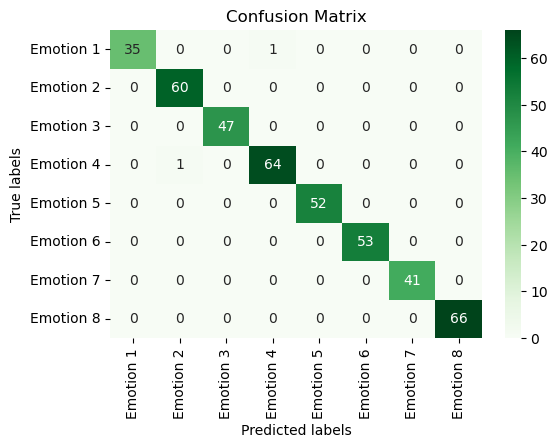

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test_s1,X_test_s1])  # Example of getting predictions, adjust according to your model

# Map numerical labels to emotion names
label_names = ["Emotion 1", "Emotion 2", "Emotion 3", "Emotion 4", "Emotion 5", "Emotion 6", "Emotion 7", "Emotion 8"]

# Generate confusion matrix
cm = confusion_matrix(np.argmax(y_test_s1, axis=1), np.argmax(y_pred, axis=1))

# Plot confusion matrix with emotion names
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


27/27 [==============================] - 4s 157ms/step


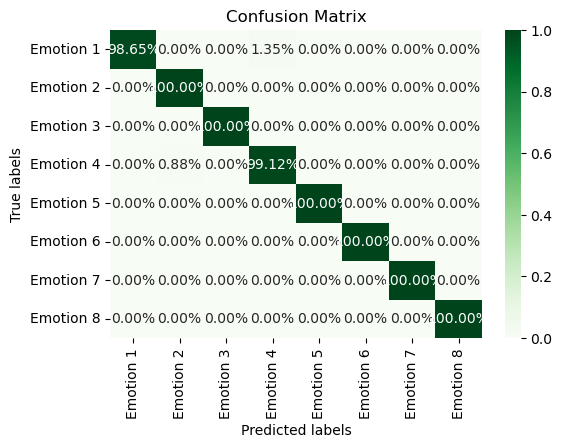

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test_s1,X_test_s1])  # Example of getting predictions, adjust according to your model

# Map numerical labels to emotion names
label_names = ["Emotion 1", "Emotion 2", "Emotion 3", "Emotion 4", "Emotion 5", "Emotion 6", "Emotion 7", "Emotion 8"]

# Generate confusion matrix
cm = confusion_matrix(np.argmax(y_test_s1, axis=1), np.argmax(y_pred, axis=1))
# Calculate row-wise sum to get total number of samples in each true class
row_sums = cm.sum(axis=1, keepdims=True)

# Normalize confusion matrix to get percentages
cm_percentage = cm / row_sums

# Plot confusion matrix with emotion names
plt.figure(figsize=(6, 4))
sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='Greens', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [27]:
from sklearn.metrics import classification_report

# Assuming you have true labels y_test_s1 and predicted labels y_pred
print(classification_report(np.argmax(y_test_s1, axis=1), np.argmax(y_pred, axis=1), target_names=label_binarizer.classes_))


              precision    recall  f1-score   support

           1       1.00      0.99      0.99        74
           2       0.99      1.00      1.00       121
           3       1.00      1.00      1.00       116
           4       0.99      0.99      0.99       114
           5       1.00      1.00      1.00       101
           6       1.00      1.00      1.00        95
           7       1.00      1.00      1.00        93
           8       1.00      1.00      1.00       126

    accuracy                           1.00       840
   macro avg       1.00      1.00      1.00       840
weighted avg       1.00      1.00      1.00       840



In [3]:
# Train the model
model.fit([X_train_s1, X_train_s1], y_train_s1, batch_size=32, epochs=100, validation_data=([X_test_s1, X_test_s1], y_test_s1))

Epoch 1/100


118/118 [==============================] - 187s 1s/step - loss: 2.0966 - accuracy: 0.3173 - val_loss: 4.3440 - val_accuracy: 0.1476
Epoch 2/100
118/118 [==============================] - 125s 1s/step - loss: 1.3137 - accuracy: 0.5416 - val_loss: 1.0607 - val_accuracy: 0.6214
Epoch 3/100
118/118 [==============================] - 129s 1s/step - loss: 0.8525 - accuracy: 0.6901 - val_loss: 2.4654 - val_accuracy: 0.4952
Epoch 4/100
118/118 [==============================] - 1735s 15s/step - loss: 0.5652 - accuracy: 0.8061 - val_loss: 1.1573 - val_accuracy: 0.6405
Epoch 5/100
118/118 [==============================] - 80s 676ms/step - loss: 0.4636 - accuracy: 0.8406 - val_loss: 2.2328 - val_accuracy: 0.5071
Epoch 6/100
118/118 [==============================] - 97s 820ms/step - loss: 0.3311 - accuracy: 0.8848 - val_loss: 0.8175 - val_accuracy: 0.7119
Epoch 7/100
118/118 [==============================] - 108s 919ms/step - loss: 0.1825 - accuracy: 0.9415 - val_loss: 0.6316 - va

In [8]:
from sklearn.metrics import classification_report

# Assuming you have true labels y_test_s1 and predicted labels y_pred
print(classification_report(np.argmax(y_test_s1, axis=1), np.argmax(y_pred, axis=1), target_names=label_binarizer.classes_))


              precision    recall  f1-score   support

           1       0.99      0.99      0.99        74
           2       0.94      0.99      0.96       121
           3       0.99      0.99      0.99       116
           4       1.00      0.95      0.97       114
           5       1.00      0.96      0.98       101
           6       0.97      1.00      0.98        95
           7       0.97      1.00      0.98        93
           8       1.00      0.98      0.99       126

    accuracy                           0.98       840
   macro avg       0.98      0.98      0.98       840
weighted avg       0.98      0.98      0.98       840



In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test_s1,X_test_s1])  # Example of getting predictions, adjust according to your model

# Calculate confusion matrix as before
cm = confusion_matrix(np.argmax(y_test_s1, axis=1), np.argmax(y_pred, axis=1))


print(cm)


27/27 [==============================] - 4s 165ms/step
[[ 73   1   0   0   0   0   0   0]
 [  0 120   0   0   0   0   1   0]
 [  0   0 115   0   0   1   0   0]
 [  0   4   0 108   0   1   1   0]
 [  0   2   1   0  97   1   0   0]
 [  0   0   0   0   0  95   0   0]
 [  0   0   0   0   0   0  93   0]
 [  1   1   0   0   0   0   1 123]]


0.2 test size 0.5 dropout

27/27 [==============================] - 4s 157ms/step


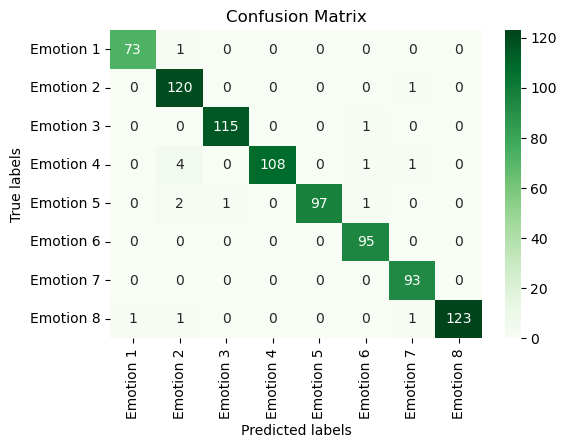

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test_s1,X_test_s1])  # Example of getting predictions, adjust according to your model

# Map numerical labels to emotion names
label_names = ["Emotion 1", "Emotion 2", "Emotion 3", "Emotion 4", "Emotion 5", "Emotion 6", "Emotion 7", "Emotion 8"]

# Generate confusion matrix
cm = confusion_matrix(np.argmax(y_test_s1, axis=1), np.argmax(y_pred, axis=1))

# Plot confusion matrix with emotion names
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Assuming you have trained your CNN model and stored the trained model
# Replace these lines with your actual training code
# model = ... (your CNN model)
# history = model.fit([X_train_s1, X_train_s1], y_train_s1, batch_size=32, epochs=100, validation_data=([X_test_s1, X_test_s1], y_test_s1))

# Now, let's extract the loss values during training
train_loss = []
val_loss = []

# Run inference on training and validation data for each epoch and collect loss values
for epoch in range(1, 101):  # Assuming you trained for 100 epochs
    # Run inference on training data
    train_loss.append(model.evaluate([X_train_s1, X_train_s1], y_train_s1, verbose=0)[0])
    
    # Run inference on validation data
    val_loss.append(model.evaluate([X_test_s1, X_test_s1], y_test_s1, verbose=0)[0])

# Plot loss vs. epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()


27/27 [==============================] - 5s 191ms/step


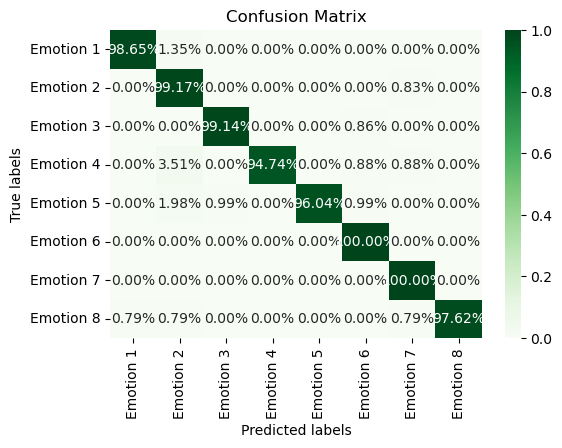

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test_s1,X_test_s1])  # Example of getting predictions, adjust according to your model

# Map numerical labels to emotion names
label_names = ["neutral", "calm", "happy", "sad", "angry", "fearful", "disgust", "surprised"]

# Generate confusion matrix
cm = confusion_matrix(np.argmax(y_test_s1, axis=1), np.argmax(y_pred, axis=1))
# Calculate row-wise sum to get total number of samples in each true class
row_sums = cm.sum(axis=1, keepdims=True)

# Normalize confusion matrix to get percentages
cm_percentage = cm / row_sums

# Plot confusion matrix with emotion names
plt.figure(figsize=(6, 4))
sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='Greens', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


0.2 test size,0.5 dropout

In [5]:
from tensorflow.keras.models import save_model

model_path = r"C:\Users\adwit\Downloads\cnn_models\test02.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)


C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: C:\Users\adwit\Downloads\cnn_models\test02.h5


In [3]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(256, (3,3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

flatten_layer = Flatten()(x3)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x3)

# Extract features
features = feature_extraction_model.predict([spectrograms, spectrograms])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas3same.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels3same.npy",labels)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 128, 128, 32)         896       ['input_3[0][0]']             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 128, 128, 128)        3584      ['input_4[0][0]']             
                                                                                             

In [5]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

chromagrams = []
labels = []

for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            chromagrams.append(img_array)
            labels.append(emotion_category)

chromagrams = np.array(chromagrams)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(chromagrams, labels, test_size=0.1, random_state=42)

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [6]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

flatten_layer = Flatten()(x3)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# New model to extract features
feature_extraction_model = Model(inputs=model.input, outputs=x3)

# Extract features
features = feature_extraction_model.predict([chromagrams, chromagrams])

# Save features as .npy file
np.save(r"C:\Users\adwit\Downloads\combined_features\chromaograms_feas3256.npy", features)
np.save(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labels3256.npy",labels)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 128, 128, 32)         896       ['input_5[0][0]']             
                                                                                                  
 conv2d_7 (Conv2D)           (None, 128, 128, 128)        3584      ['input_6[0][0]']             
                                                                                            

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas3same.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromaograms_feas3256.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labels3256.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)

# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.1, random_state=42)




 

In [2]:
import numpy as np

# Assuming x_train is your training data
print("Shape of x_train:", X_train_co.shape)


Shape of x_train: (3776, 42, 21, 256)


In [3]:
    from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(42, 21, 256)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),  
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [4]:
# Train the model
model.fit(X_train_co, y_train_co, epochs=200, batch_size=32, validation_data=(X_test_co, y_test_co))

Epoch 1/200


118/118 [==============================] - 18s 130ms/step - loss: 2.4473 - accuracy: 0.2389 - val_loss: 6.8738 - val_accuracy: 0.1524
Epoch 2/200
118/118 [==============================] - 11s 93ms/step - loss: 1.5710 - accuracy: 0.4656 - val_loss: 2.2127 - val_accuracy: 0.3595
Epoch 3/200
118/118 [==============================] - 20s 168ms/step - loss: 0.9991 - accuracy: 0.6560 - val_loss: 2.7069 - val_accuracy: 0.3786
Epoch 4/200
118/118 [==============================] - 11s 93ms/step - loss: 0.5523 - accuracy: 0.8109 - val_loss: 2.9543 - val_accuracy: 0.3952
Epoch 5/200
118/118 [==============================] - 12s 101ms/step - loss: 0.2741 - accuracy: 0.9094 - val_loss: 0.8971 - val_accuracy: 0.7357
Epoch 6/200
118/118 [==============================] - 12s 103ms/step - loss: 0.1740 - accuracy: 0.9486 - val_loss: 0.8573 - val_accuracy: 0.7405
Epoch 7/200
118/118 [==============================] - 14s 120ms/step - loss: 0.1475 - accuracy: 0.9489 - val_loss: 0.8447 -

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas3512.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas3512.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels3512.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.1, random_state=42)



In [2]:
    from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(36, 18, 512)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu'),
    BatchNormalization(),  
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [11]:
# Train the model
model.fit(X_train_co, y_train_co, epochs=200, batch_size=32, validation_data=(X_test_co, y_test_co))

NameError: name 'X_train_co' is not defined

Chromagrams

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

chromagrams = []
labels = []

for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            chromagrams.append(img_array)
            labels.append(emotion_category)

chromagrams = np.array(chromagrams)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(chromagrams, labels, test_size=0.2, random_state=42)

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [2]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)
# New Convolutional Layer
x4 = Conv2D(512, (3,3), activation='relu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)
flatten_layer = Flatten()(x4)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()






Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 128)        3584      ['input_2[0][0]']             
                                                                                           

In [3]:
# Train the model
history = model.fit([X_train, X_train], y_train, batch_size=32, epochs=100, validation_data=([X_test, X_test], y_test))

Epoch 1/100


105/105 [==============================] - 131s 1s/step - loss: 2.3718 - accuracy: 0.2649 - val_loss: 17.8577 - val_accuracy: 0.1476
Epoch 2/100
105/105 [==============================] - 202s 2s/step - loss: 1.7366 - accuracy: 0.4100 - val_loss: 1.3848 - val_accuracy: 0.4893
Epoch 3/100
105/105 [==============================] - 203s 2s/step - loss: 1.3133 - accuracy: 0.5328 - val_loss: 3.0501 - val_accuracy: 0.3048
Epoch 4/100
105/105 [==============================] - 209s 2s/step - loss: 0.8553 - accuracy: 0.6958 - val_loss: 3.5955 - val_accuracy: 0.2893
Epoch 5/100
105/105 [==============================] - 187s 2s/step - loss: 0.4818 - accuracy: 0.8430 - val_loss: 0.8115 - val_accuracy: 0.7357
Epoch 6/100
105/105 [==============================] - 180s 2s/step - loss: 0.2805 - accuracy: 0.9118 - val_loss: 0.3797 - val_accuracy: 0.8726
Epoch 7/100
105/105 [==============================] - 181s 2s/step - loss: 0.1870 - accuracy: 0.9398 - val_loss: 0.4523 - val_accura

In [3]:
# Train the model
history = model.fit([X_train, X_train], y_train, batch_size=32, epochs=100, validation_data=([X_test, X_test], y_test))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02chromanew.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test, X_test])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


Epoch 1/100


105/105 [==============================] - 230s 2s/step - loss: 2.4520 - accuracy: 0.2548 - val_loss: 11.2649 - val_accuracy: 0.1417
Epoch 2/100
105/105 [==============================] - 230s 2s/step - loss: 1.8285 - accuracy: 0.3877 - val_loss: 3.6056 - val_accuracy: 0.2452
Epoch 3/100
105/105 [==============================] - 213s 2s/step - loss: 1.3925 - accuracy: 0.5170 - val_loss: 1.1734 - val_accuracy: 0.5798
Epoch 4/100
105/105 [==============================] - 208s 2s/step - loss: 0.9243 - accuracy: 0.6597 - val_loss: 3.5594 - val_accuracy: 0.2274
Epoch 5/100
105/105 [==============================] - 211s 2s/step - loss: 0.5400 - accuracy: 0.8096 - val_loss: 4.6548 - val_accuracy: 0.1893
Epoch 6/100
105/105 [==============================] - 216s 2s/step - loss: 0.3675 - accuracy: 0.8778 - val_loss: 1.1083 - val_accuracy: 0.6726
Epoch 7/100
105/105 [==============================] - 212s 2s/step - loss: 0.1922 - accuracy: 0.9377 - val_loss: 0.2038 - val_accura

C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: C:\Users\adwit\Downloads\cnn_models\test02chromanew.h5


MemoryError: Unable to allocate 630. MiB for an array with shape (840, 256, 256, 3) and data type float32

27/27 [==============================] - 7s 246ms/step
Accuracy: 0.9761904761904762
Average Precision: 0.9770721788727162
Average Recall: 0.9761904761904762
Average F1-score: 0.9762887536704727


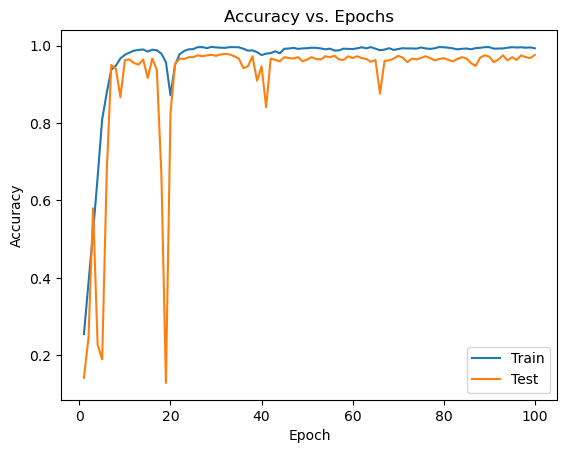

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test, X_test])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


In [ ]:
# Train the model
history = model.fit([X_train, X_train], y_train, batch_size=32, epochs=100, validation_data=([X_test, X_test], y_test))

Epoch 1/100

105/105 [==============================] - 179s 2s/step - loss: 0.0139 - accuracy: 0.9961 - val_loss: 0.2583 - val_accuracy: 0.9714
Epoch 2/100
105/105 [==============================] - 191s 2s/step - loss: 0.0107 - accuracy: 0.9943 - val_loss: 0.2213 - val_accuracy: 0.9702
Epoch 3/100
105/105 [==============================] - 186s 2s/step - loss: 0.0121 - accuracy: 0.9964 - val_loss: 0.2175 - val_accuracy: 0.9595
Epoch 4/100
105/105 [==============================] - 183s 2s/step - loss: 0.0105 - accuracy: 0.9964 - val_loss: 0.1646 - val_accuracy: 0.9738
Epoch 5/100
105/105 [==============================] - 182s 2s/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 0.2423 - val_accuracy: 0.9690
Epoch 6/100
105/105 [==============================] - 170s 2s/step - loss: 0.0240 - accuracy: 0.9928 - val_loss: 0.3851 - val_accuracy: 0.9548
Epoch 7/100
105/105 [==============================] - 166s 2s/step - loss: 0.0181 - accuracy: 0.9931 - val_loss: 0.2220 - val_accuracy

In [5]:
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02chroma.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)


C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: C:\Users\adwit\Downloads\cnn_models\test02chroma.h5


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test, X_test])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)


27/27 [==============================] - 7s 255ms/step
Accuracy: 0.9702380952380952
Average Precision: 0.9713163860649424
Average Recall: 0.9702380952380952
Average F1-score: 0.9702401896701572


In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Step 1: Load the model
model = tf.keras.models.load_model(r"C:\Users\adwit\Downloads\cnn_models\test02chroma.h5")

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()7=4u
plt.show()


NameError: name 'history' is not defined

Epoch 1/100
105/105 [==============================] - 160s 1s/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.3102 - val_accuracy: 0.9607
Epoch 2/100
105/105 [==============================] - 188s 2s/step - loss: 0.0100 - accuracy: 0.9961 - val_loss: 0.2974 - val_accuracy: 0.9667
Epoch 3/100
105/105 [==============================] - 168s 2s/step - loss: 0.0135 - accuracy: 0.9946 - val_loss: 0.2142 - val_accuracy: 0.9690
Epoch 4/100
105/105 [==============================] - 172s 2s/step - loss: 0.0136 - accuracy: 0.9958 - val_loss: 0.2863 - val_accuracy: 0.9679
Epoch 5/100
105/105 [==============================] - 179s 2s/step - loss: 0.0162 - accuracy: 0.9949 - val_loss: 0.3184 - val_accuracy: 0.9667
Epoch 6/100
105/105 [==============================] - 176s 2s/step - loss: 0.0169 - accuracy: 0.9937 - val_loss: 0.2803 - val_accuracy: 0.9607
Epoch 7/100
105/105 [==============================] - 177s 2s/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.2231 - val_accuracy:

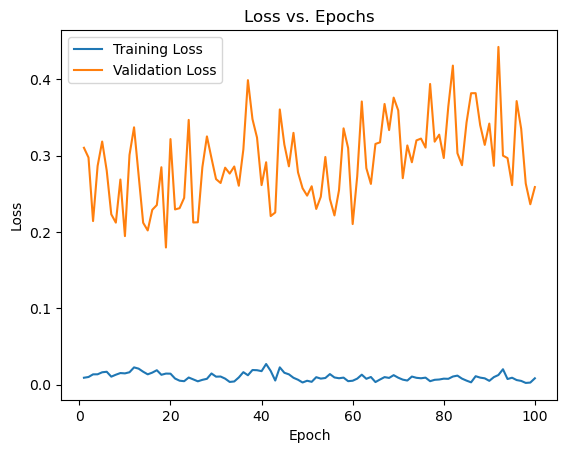

In [7]:
import matplotlib.pyplot as plt

# Assuming you have trained your CNN model and stored the history object
# Replace these lines with your actual training code
history = model.fit([X_train, X_train], y_train, batch_size=32, epochs=100, validation_data=([X_test, X_test], y_test))

# Extract loss values from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs. epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()


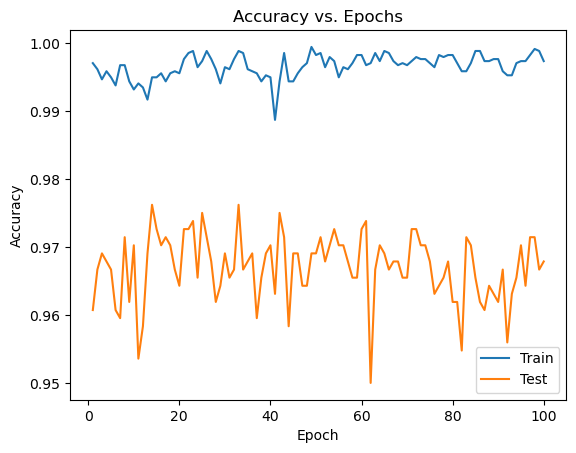

In [8]:
import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()


In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\specti-newaug"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(spectrograms, labels, test_size=0.2, random_state=42)
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [2]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout

input_shape = (256,256, 3)

# First Input and Convolutional Block
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

# Second Input and Convolutional Block
input_layer2 = Input(shape=input_shape)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

# Concatenation
concatenated_input = Concatenate()([x1, x2])

# Third Convolutional Block
x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

# Flatten and Dense Layers
flatten_layer = Flatten()(x3)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# Output layer
num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Model definition and compilation
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 128)        3584      ['input_2[0][0]']             
                                                                                           

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test, X_test])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


Epoch 1/100


105/105 [==============================] - 136s 1s/step - loss: 1.8631 - accuracy: 0.3704 - val_loss: 5.0492 - val_accuracy: 0.1750
Epoch 2/100
105/105 [==============================] - 122s 1s/step - loss: 0.9973 - accuracy: 0.6463 - val_loss: 1.5936 - val_accuracy: 0.4310
Epoch 3/100
105/105 [==============================] - 115s 1s/step - loss: 0.5977 - accuracy: 0.7878 - val_loss: 1.7220 - val_accuracy: 0.4643
Epoch 4/100
105/105 [==============================] - 102s 975ms/step - loss: 0.2964 - accuracy: 0.9035 - val_loss: 0.9944 - val_accuracy: 0.6417
Epoch 5/100
105/105 [==============================] - 104s 995ms/step - loss: 0.1301 - accuracy: 0.9610 - val_loss: 0.8876 - val_accuracy: 0.7333
Epoch 6/100
105/105 [==============================] - 99s 942ms/step - loss: 0.0921 - accuracy: 0.9735 - val_loss: 1.1521 - val_accuracy: 0.6750
Epoch 7/100
105/105 [==============================] - 101s 959ms/step - loss: 0.0539 - accuracy: 0.9854 - val_loss: 0.6044 - 

C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: C:\Users\adwit\Downloads\cnn_models\test02spectronew.h5
27/27 [==============================] - 9s 310ms/step
Accuracy: 0.9892857142857143
Average Precision: 0.9893939526919818
Average Recall: 0.9892857142857143
Average F1-score: 0.9892668037061088


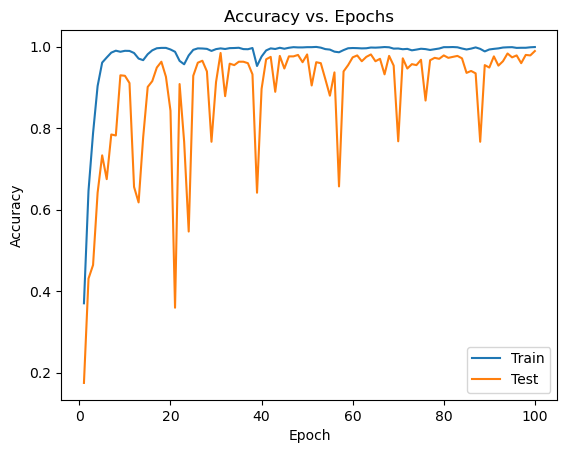

In [3]:
# Train the model
history = model.fit([X_train, X_train], y_train, batch_size=32, epochs=100, validation_data=([X_test, X_test], y_test))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02spectronew.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test, X_test])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


27/27 [==============================] - 6s 205ms/step


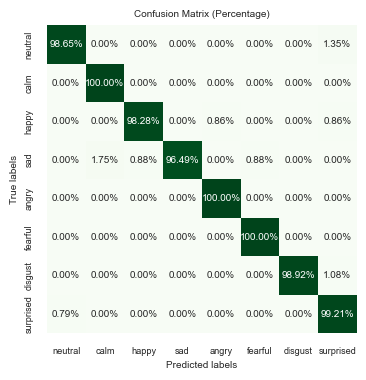

Confusion Matrix Counts:
[[0.98648649 0.         0.         0.         0.         0.
  0.         0.01351351]
 [0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.98275862 0.         0.00862069 0.
  0.         0.00862069]
 [0.         0.01754386 0.00877193 0.96491228 0.         0.00877193
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.98924731 0.01075269]
 [0.00793651 0.         0.         0.         0.         0.
  0.         0.99206349]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # for a nicer visualization
from tensorflow.keras.models import load_model


# Generate some example data for demonstration
# Example: Replace this with your actual test data
# X_test = ...
# y_test = ...

# Make predictions on the test data
# Example:
y_pred = model.predict([X_test,X_test])
# If your model outputs probabilities, you might want to convert them to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
# Convert one-hot encoded labels to single-label format
y_test_single_label = np.argmax(y_test, axis=1)
# Define class labels
class_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']  # Replace with your actual class labels

# Create confusion matrix
cm = confusion_matrix(y_test_single_label, y_pred_labels)

# Normalize confusion matrix to percentages
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.figure(figsize=(4,4))
sns.set(font_scale=0.6)  # for label size
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Greens', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Percentage)')
plt.show()

# Inspect confusion matrix counts
print("Confusion Matrix Counts:")
print(cm)

27/27 [==============================] - 7s 250ms/step


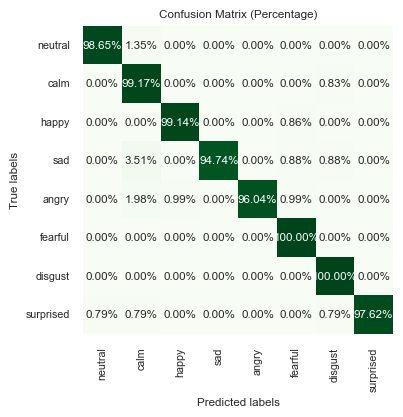

Confusion Matrix Counts:
[[0.98648649 0.01351351 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.99173554 0.         0.         0.         0.
  0.00826446 0.        ]
 [0.         0.         0.99137931 0.         0.         0.00862069
  0.         0.        ]
 [0.         0.03508772 0.         0.94736842 0.         0.00877193
  0.00877193 0.        ]
 [0.         0.01980198 0.00990099 0.         0.96039604 0.00990099
  0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.        ]
 [0.00793651 0.00793651 0.         0.         0.         0.
  0.00793651 0.97619048]]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # for a nicer visualization
from tensorflow.keras.models import load_model

# Load the saved model from the HDF5 file
model = load_model(r"C:\Users\adwit\Downloads\cnn_models\test02.h5")

# Generate some example data for demonstration
# Example: Replace this with your actual test data
# X_test = ...
# y_test = ...

# Make predictions on the test data
# Example:
y_pred = model.predict([X_test,X_test])
# If your model outputs probabilities, you might want to convert them to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
# Convert one-hot encoded labels to single-label format
y_test_single_label = np.argmax(y_test, axis=1)
# Define class labels
class_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']  # Replace with your actual class labels

# Create confusion matrix
cm = confusion_matrix(y_test_single_label, y_pred_labels)

# Normalize confusion matrix to percentages
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.figure(figsize=(4,4))
sns.set(font_scale=0.7)  # for label size
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Greens', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Percentage)')
plt.show()

# Inspect confusion matrix counts
print("Confusion Matrix Counts:")
print(cm)

0.2test 0.4 dropout

In [2]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout

input_shape = (256,256, 3)

# First Input and Convolutional Block
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

# Second Input and Convolutional Block
input_layer2 = Input(shape=input_shape)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

# Concatenation
concatenated_input = Concatenate()([x1, x2])

# Third Convolutional Block
x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

# Flatten and Dense Layers
flatten_layer = Flatten()(x3)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

# Output layer
num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Model definition and compilation
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 128)        3584      ['input_2[0][0]']             
                                                                                           

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\specti-newaug"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(spectrograms, labels, test_size=0.2, random_state=42)
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [2]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

# New Convolutional Layer
x4 = Conv2D(256, (3, 3), activation='relu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

# Additional Convolutional Block
x5 = Conv2D(512, (5, 5), activation='relu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)

flatten_layer = Flatten()(x5)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)


num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()






Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 64)         1792      ['input_2[0][0]']             
                                                                                           

Epoch 1/100


105/105 [==============================] - 67s 599ms/step - loss: 1.8335 - accuracy: 0.3561 - val_loss: 5.2353 - val_accuracy: 0.1714
Epoch 2/100
105/105 [==============================] - 72s 692ms/step - loss: 1.2128 - accuracy: 0.5611 - val_loss: 1.5575 - val_accuracy: 0.4619
Epoch 3/100
105/105 [==============================] - 105s 1s/step - loss: 0.7687 - accuracy: 0.7315 - val_loss: 1.0189 - val_accuracy: 0.6310
Epoch 4/100
105/105 [==============================] - 92s 877ms/step - loss: 0.4190 - accuracy: 0.8656 - val_loss: 1.0603 - val_accuracy: 0.6155
Epoch 5/100
105/105 [==============================] - 86s 823ms/step - loss: 0.1673 - accuracy: 0.9601 - val_loss: 0.4636 - val_accuracy: 0.8333
Epoch 6/100
105/105 [==============================] - 89s 849ms/step - loss: 0.0737 - accuracy: 0.9884 - val_loss: 0.3766 - val_accuracy: 0.8845
Epoch 7/100
105/105 [==============================] - 109s 1s/step - loss: 0.0279 - accuracy: 0.9979 - val_loss: 0.2766 - v

C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: C:\Users\adwit\Downloads\cnn_models\test02spectrocomplex.h5
27/27 [==============================] - 9s 284ms/step
Accuracy: 0.9904761904761905
Average Precision: 0.99058945116581
Average Recall: 0.9904761904761905
Average F1-score: 0.9904470633260644


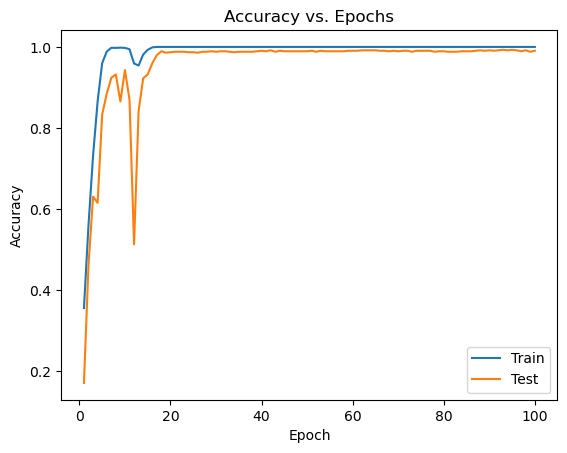

In [3]:
# Train the model
history = model.fit([X_train, X_train], y_train, batch_size=32, epochs=100, validation_data=([X_test, X_test], y_test))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02spectrocomplex.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test, X_test])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


In [4]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

chromagrams = []
labels = []

for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            chromagrams.append(img_array)
            labels.append(emotion_category)

chromagrams = np.array(chromagrams)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(chromagrams, labels, test_size=0.2, random_state=42)

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [5]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='elu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)
# New Convolutional Layer
x4 = Conv2D(128, (3,3), activation='elu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

x5 = Conv2D(256, (3,3), activation='elu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)

x6 = Conv2D(512, (3,3), activation='elu', padding='same')(x5)
x6 = BatchNormalization()(x6)
x6 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x6)
flatten_layer = Flatten()(x6)
x = Dense(128, activation='elu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 128, 128, 32)         896       ['input_3[0][0]']             
                                                                                                  
 conv2d_3 (Conv2D)           (None, 128, 128, 64)         1792      ['input_4[0][0]']             
                                                                                            

In [5]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='elu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)
# New Convolutional Layer
x4 = Conv2D(128, (3,3), activation='elu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

x5 = Conv2D(256, (3,3), activation='elu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)

x6 = Conv2D(256, (3,3), activation='elu', padding='same')(x5)
x6 = BatchNormalization()(x6)
x6 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x6)
flatten_layer = Flatten()(x6)
x = Dense(128, activation='elu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 128, 128, 32)         896       ['input_3[0][0]']             
                                                                                                  
 conv2d_7 (Conv2D)           (None, 128, 128, 64)         1792      ['input_4[0][0]']             
                                                                                            

Epoch 1/100
105/105 [==============================] - 59s 485ms/step - loss: 1.9341 - accuracy: 0.3382 - val_loss: 4.6063 - val_accuracy: 0.1488
Epoch 2/100
105/105 [==============================] - 40s 377ms/step - loss: 1.0713 - accuracy: 0.6097 - val_loss: 1.3671 - val_accuracy: 0.5036
Epoch 3/100
105/105 [==============================] - 45s 429ms/step - loss: 0.5763 - accuracy: 0.8054 - val_loss: 1.8671 - val_accuracy: 0.4905
Epoch 4/100
105/105 [==============================] - 66s 634ms/step - loss: 0.2916 - accuracy: 0.9046 - val_loss: 1.0864 - val_accuracy: 0.6917
Epoch 5/100
105/105 [==============================] - 69s 653ms/step - loss: 0.2173 - accuracy: 0.9249 - val_loss: 0.9295 - val_accuracy: 0.7679
Epoch 6/100
105/105 [==============================] - 69s 659ms/step - loss: 0.1418 - accuracy: 0.9550 - val_loss: 0.4442 - val_accuracy: 0.8833
Epoch 7/100
105/105 [==============================] - 64s 610ms/step - loss: 0.1141 - accuracy: 0.9604 - val_loss: 0.9392 -

C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: C:\Users\adwit\Downloads\cnn_models\test02chromaelucomplex.h5
27/27 [==============================] - 7s 194ms/step
Accuracy: 0.9797619047619047
Average Precision: 0.9799674193214019
Average Recall: 0.9797619047619047
Average F1-score: 0.9797498036335136


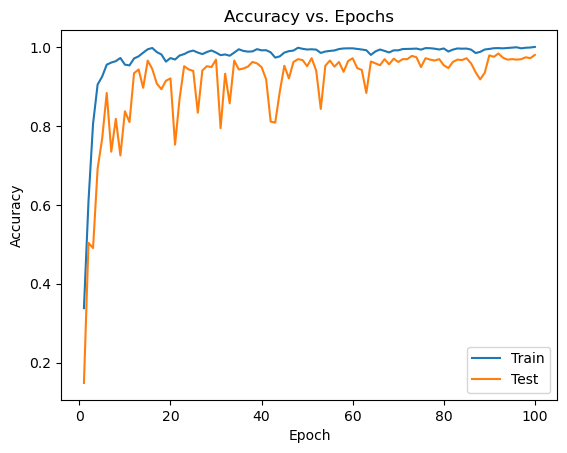

In [6]:
# Train the model
history = model.fit([X_train, X_train], y_train, batch_size=32, epochs=100, validation_data=([X_test, X_test], y_test))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02chromaelucomplex.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test, X_test])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


27/27 [==============================] - 3s 91ms/step


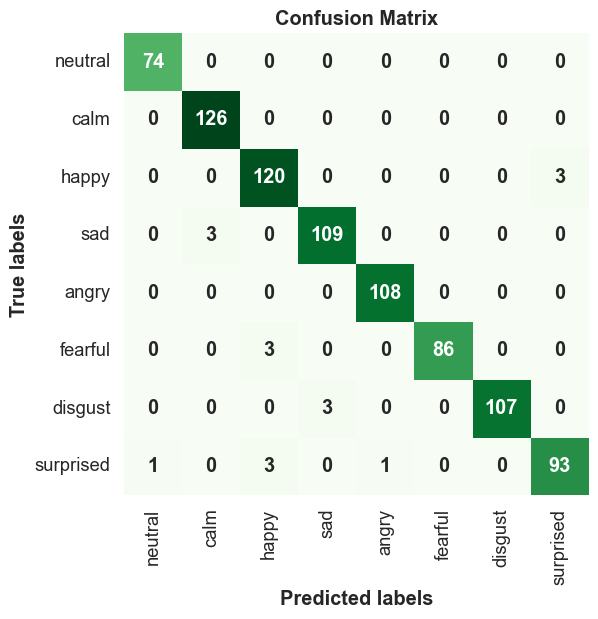

Confusion Matrix Counts:
[[ 74   0   0   0   0   0   0   0]
 [  0 126   0   0   0   0   0   0]
 [  0   0 120   0   0   0   0   3]
 [  0   3   0 109   0   0   0   0]
 [  0   0   0   0 108   0   0   0]
 [  0   0   3   0   0  86   0   0]
 [  0   0   0   3   0   0 107   0]
 [  1   0   3   0   1   0   0  93]]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # for a nicer visualization
from tensorflow.keras.models import load_model

# Load the saved model from the HDF5 file
model = load_model(r"C:\Users\adwit\Downloads\cnn_models\test02chromaelucomplex.h5")

# Generate some example data for demonstration
# Example: Replace this with your actual test data
# X_test = ...
# y_test = ...

# Make predictions on the test data
# Example:
y_pred = model.predict([X_test,X_test])
# If your model outputs probabilities, you might want to convert them to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
# Convert one-hot encoded labels to single-label format
y_test_single_label = np.argmax(y_test, axis=1)
# Define class labels
class_labels = ['neutral', 'calm', 'happy', 'sad','angry','fearful','disgust','surprised']  # Replace with your actual class labels

# Create confusion matrix
cm = confusion_matrix(y_test_single_label, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.set(font_scale=1.2)  # for label size
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=class_labels, yticklabels=class_labels, annot_kws={"weight": "bold"})
plt.xlabel('Predicted labels', fontweight='bold')
plt.ylabel('True labels', fontweight='bold')
plt.title('Confusion Matrix', fontweight='bold')
plt.show()

# Inspect confusion matrix counts
print("Confusion Matrix Counts:")
print(cm)


Epoch 1/100
105/105 [==============================] - 249s 2s/step - loss: 1.8876 - accuracy: 0.3451 - val_loss: 4.9234 - val_accuracy: 0.1806
Epoch 2/100
105/105 [==============================] - 120s 1s/step - loss: 1.1176 - accuracy: 0.6146 - val_loss: 1.6212 - val_accuracy: 0.4688
Epoch 3/100
105/105 [==============================] - 109s 1s/step - loss: 0.7277 - accuracy: 0.7497 - val_loss: 1.3045 - val_accuracy: 0.6111
Epoch 4/100
105/105 [==============================] - 87s 834ms/step - loss: 0.3114 - accuracy: 0.8977 - val_loss: 1.2488 - val_accuracy: 0.6528
Epoch 5/100
105/105 [==============================] - 94s 898ms/step - loss: 0.3164 - accuracy: 0.8941 - val_loss: 1.0803 - val_accuracy: 0.7118
Epoch 6/100
105/105 [==============================] - 96s 917ms/step - loss: 0.2134 - accuracy: 0.9301 - val_loss: 0.2922 - val_accuracy: 0.9039
Epoch 7/100
105/105 [==============================] - 95s 894ms/step - loss: 0.2506 - accuracy: 0.9211 - val_loss: 0.6870 - val_a

C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: C:\Users\adwit\Downloads\cnn_models\test0205CHROMAcomplex.h5
27/27 [==============================] - 8s 225ms/step
Accuracy: 0.9652777777777778
Average Precision: 0.9657024209640247
Average Recall: 0.9652777777777778
Average F1-score: 0.9651490802692217


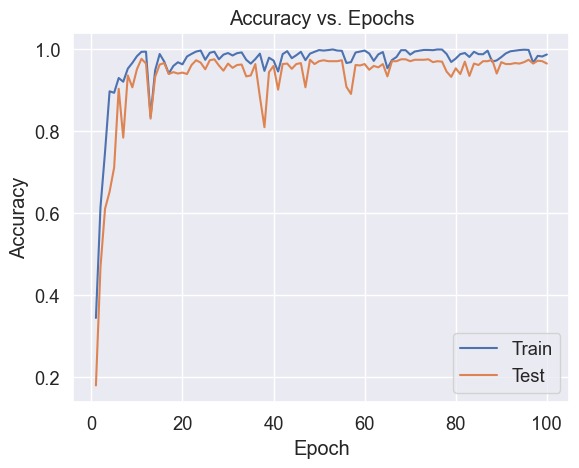

In [12]:
# Train the model
history = model.fit([X_train, X_train], y_train, batch_size=32, epochs=100, validation_data=([X_test, X_test], y_test))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test0205CHROMAcomplex.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test, X_test])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


27/27 [==============================] - 4s 112ms/step


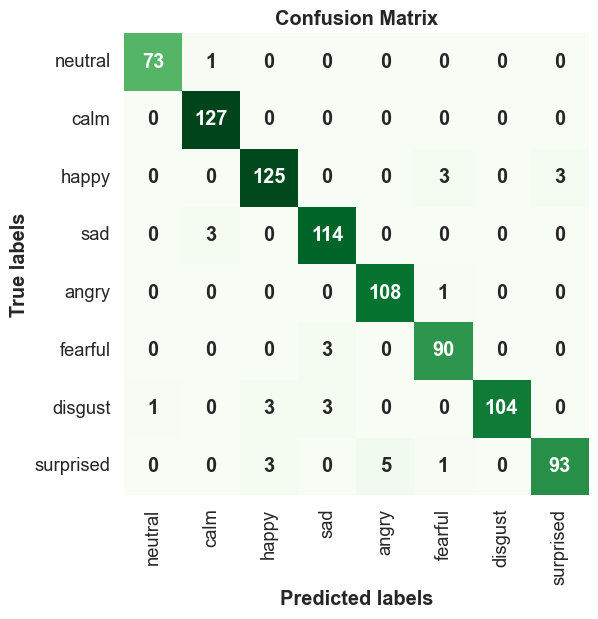

Confusion Matrix Counts:
[[ 73   1   0   0   0   0   0   0]
 [  0 127   0   0   0   0   0   0]
 [  0   0 125   0   0   3   0   3]
 [  0   3   0 114   0   0   0   0]
 [  0   0   0   0 108   1   0   0]
 [  0   0   0   3   0  90   0   0]
 [  1   0   3   3   0   0 104   0]
 [  0   0   3   0   5   1   0  93]]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # for a nicer visualization
from tensorflow.keras.models import load_model

# Load the saved model from the HDF5 file
model = load_model(r"C:\Users\adwit\Downloads\cnn_models\test0205CHROMAcomplex.h5")

# Generate some example data for demonstration
# Example: Replace this with your actual test data
# X_test = ...
# y_test = ...

# Make predictions on the test data
# Example:
y_pred = model.predict([X_test,X_test])
# If your model outputs probabilities, you might want to convert them to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
# Convert one-hot encoded labels to single-label format
y_test_single_label = np.argmax(y_test, axis=1)
# Define class labels
class_labels = ['neutral', 'calm', 'happy', 'sad','angry','fearful','disgust','surprised']  # Replace with your actual class labels

# Create confusion matrix
cm = confusion_matrix(y_test_single_label, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.set(font_scale=1.2)  # for label size
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=class_labels, yticklabels=class_labels, annot_kws={"weight": "bold"})
plt.xlabel('Predicted labels', fontweight='bold')
plt.ylabel('True labels', fontweight='bold')
plt.title('Confusion Matrix', fontweight='bold')
plt.show()

# Inspect confusion matrix counts
print("Confusion Matrix Counts:")
print(cm)


k-fold validation

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

chromagrams = []
labels = []

for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256, 256, 3))
            img_array = img_to_array(img)
            chromagrams.append(img_array)
            labels.append(emotion_category)

chromagrams = np.array(chromagrams)
labels = np.array(labels)

# Define the number of folds for k-fold cross-validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)


In [2]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='elu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)
# New Convolutional Layer
x4 = Conv2D(128, (3,3), activation='elu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

x5 = Conv2D(256, (3,3), activation='elu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)

x6 = Conv2D(256, (3,3), activation='elu', padding='same')(x5)
x6 = BatchNormalization()(x6)
x6 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x6)
flatten_layer = Flatten()(x6)
x = Dense(128, activation='elu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()






Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 64)         1792      ['input_2[0][0]']             
                                                                                           

In [3]:
# Perform k-fold cross-validation
fold_accuracies = []

for fold, (train_indices, val_indices) in enumerate(skf.split(chromagrams, labels)):
    print(f'Fold {fold + 1}/{num_folds}')
    X_train, X_val = chromagrams[train_indices], chromagrams[val_indices]
    y_train, y_val = labels_encoded[train_indices], labels_encoded[val_indices]
    
    history = model.fit([X_train,X_train], y_train, batch_size=32, epochs=100, validation_data=([X_val,X_val], y_val), verbose=1)
    
    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    fold_accuracies.append(val_accuracy)

    # Plot accuracy vs. epochs for each fold
    plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label=f'Train Fold {fold + 1}')
    plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label=f'Val Fold {fold + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epochs')
    plt.legend()
    plt.show()

# Print average accuracy across all folds
print(f'Average accuracy across all folds: {np.mean(fold_accuracies)}')

# Save the trained model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02CHROMAkfold5.h5"
model.save(model_path)
print("Model saved successfully at:", model_path)

Fold 1/5
Epoch 1/100


105/105 [==============================] - 72s 630ms/step - loss: 1.9511 - accuracy: 0.3397 - val_loss: 4.0827 - val_accuracy: 0.1714
Epoch 2/100
105/105 [==============================] - 81s 777ms/step - loss: 1.1693 - accuracy: 0.5843 - val_loss: 1.4461 - val_accuracy: 0.5333
Epoch 3/100
105/105 [==============================] - 75s 713ms/step - loss: 0.5797 - accuracy: 0.8015 - val_loss: 1.0780 - val_accuracy: 0.6488
Epoch 4/100
105/105 [==============================] - 82s 786ms/step - loss: 0.3206 - accuracy: 0.8921 - val_loss: 1.1494 - val_accuracy: 0.6774
Epoch 5/100
105/105 [==============================] - 69s 656ms/step - loss: 0.1762 - accuracy: 0.9455 - val_loss: 0.8086 - val_accuracy: 0.7464
Epoch 6/100
105/105 [==============================] - 64s 610ms/step - loss: 0.1043 - accuracy: 0.9663 - val_loss: 0.5489 - val_accuracy: 0.8345
Epoch 7/100
105/105 [==============================] - 69s 653ms/step - loss: 0.1045 - accuracy: 0.9675 - val_los

ValueError: in user code:

    File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "model" expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 256, 256, 3) dtype=float32>]


Fold 1/5
Epoch 1/100
105/105 [==============================] - 111s 974ms/step - loss: 0.0261 - accuracy: 0.9917 - val_loss: 0.2199 - val_accuracy: 0.9595
Epoch 2/100
105/105 [==============================] - 79s 756ms/step - loss: 0.0160 - accuracy: 0.9955 - val_loss: 0.1521 - val_accuracy: 0.9726
Epoch 3/100
105/105 [==============================] - 79s 749ms/step - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.1968 - val_accuracy: 0.9738
Epoch 4/100
105/105 [==============================] - 73s 698ms/step - loss: 0.0041 - accuracy: 0.9994 - val_loss: 0.2240 - val_accuracy: 0.9679
Epoch 5/100
105/105 [==============================] - 70s 668ms/step - loss: 0.0066 - accuracy: 0.9979 - val_loss: 0.1704 - val_accuracy: 0.9690
Epoch 6/100
105/105 [==============================] - 68s 646ms/step - loss: 0.0077 - accuracy: 0.9979 - val_loss: 0.1651 - val_accuracy: 0.9714
Epoch 7/100
105/105 [==============================] - 66s 630ms/step - loss: 0.0049 - accuracy: 0.9976 - val_loss

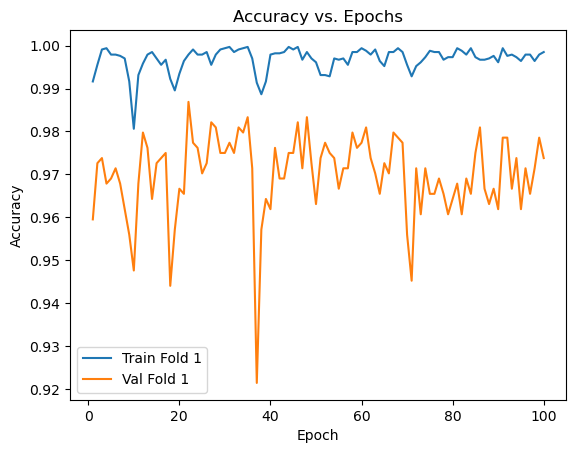

Fold 2/5
Epoch 1/100
105/105 [==============================] - 93s 858ms/step - loss: 0.0595 - accuracy: 0.9902 - val_loss: 0.0095 - val_accuracy: 0.9976
Epoch 2/100
105/105 [==============================] - 76s 725ms/step - loss: 0.0115 - accuracy: 0.9976 - val_loss: 0.0048 - val_accuracy: 0.9988
Epoch 3/100
105/105 [==============================] - 76s 726ms/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 2.1484e-04 - val_accuracy: 1.0000
Epoch 4/100
105/105 [==============================] - 66s 631ms/step - loss: 0.0037 - accuracy: 0.9985 - val_loss: 2.0977e-04 - val_accuracy: 1.0000
Epoch 5/100
105/105 [==============================] - 64s 605ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 3.9590e-05 - val_accuracy: 1.0000
Epoch 6/100
105/105 [==============================] - 65s 616ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0012 - val_accuracy: 0.9988
Epoch 7/100
105/105 [==============================] - 69s 656ms/step - loss: 0.0017 - accuracy: 0.9991

In [ ]:
# Perform k-fold cross-validation
fold_accuracies = []

for fold, (train_indices, val_indices) in enumerate(skf.split(chromagrams, labels)):
    print(f'Fold {fold + 1}/{num_folds}')
    X_train, X_val = chromagrams[train_indices], chromagrams[val_indices]
    y_train, y_val = labels_encoded[train_indices], labels_encoded[val_indices]
    
    history = model.fit([X_train,X_train], y_train, batch_size=32, epochs=100, validation_data=([X_val,X_val], y_val), verbose=1)
    
    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate([X_val,X_val], y_val, verbose=0)
    fold_accuracies.append(val_accuracy)

    # Plot accuracy vs. epochs for each fold
    plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label=f'Train Fold {fold + 1}')
    plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label=f'Val Fold {fold + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epochs')
    plt.legend()
    plt.show()

# Print average accuracy across all folds
print(f'Average accuracy across all folds: {np.mean(fold_accuracies)}')

# Save the trained model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02CHROMAkfold5.h5"
model.save(model_path)
print("Model saved successfully at:", model_path)

In [4]:
 import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\specti-newaug"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(spectrograms, labels, test_size=0.2, random_state=42)
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [5]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='elu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)
# New Convolutional Layer
x4 = Conv2D(256, (3,3), activation='elu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

x5 = Conv2D(512, (3,3), activation='elu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)

flatten_layer = Flatten()(x5)
x = Dense(128, activation='elu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 128, 128, 32)         896       ['input_3[0][0]']             
                                                                                                  
 conv2d_6 (Conv2D)           (None, 128, 128, 64)         1792      ['input_4[0][0]']             
                                                                                            

Epoch 1/100


105/105 [==============================] - 129s 1s/step - loss: 1.9786 - accuracy: 0.3290 - val_loss: 4.0813 - val_accuracy: 0.2321
Epoch 2/100
105/105 [==============================] - 80s 768ms/step - loss: 1.3924 - accuracy: 0.4863 - val_loss: 1.6869 - val_accuracy: 0.4238
Epoch 3/100
105/105 [==============================] - 110s 1s/step - loss: 1.0006 - accuracy: 0.6400 - val_loss: 3.0045 - val_accuracy: 0.3167
Epoch 4/100
105/105 [==============================] - 100s 953ms/step - loss: 0.7436 - accuracy: 0.7324 - val_loss: 1.6025 - val_accuracy: 0.5667
Epoch 5/100
105/105 [==============================] - 91s 864ms/step - loss: 0.5234 - accuracy: 0.8144 - val_loss: 1.1902 - val_accuracy: 0.6226
Epoch 6/100
105/105 [==============================] - 88s 838ms/step - loss: 0.3583 - accuracy: 0.8737 - val_loss: 2.9790 - val_accuracy: 0.4321
Epoch 7/100
105/105 [==============================] - 86s 824ms/step - loss: 0.2493 - accuracy: 0.9178 - val_loss: 1.2643 - 

C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: C:\Users\adwit\Downloads\cnn_models\test02spectroelucomplex.h5
27/27 [==============================] - 24s 687ms/step
Accuracy: 0.9595238095238096
Average Precision: 0.9617073229235156
Average Recall: 0.9595238095238096
Average F1-score: 0.9594133128626892


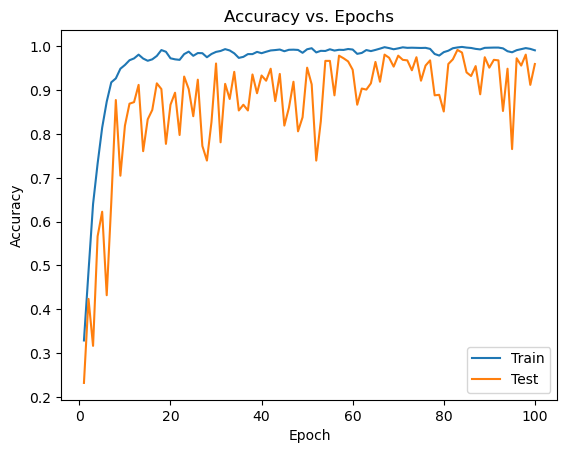

In [3]:
# Train the model
history = model.fit([X_train, X_train], y_train, batch_size=32, epochs=100, validation_data=([X_test, X_test], y_test))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02spectroelucomplex.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test, X_test])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


In [6]:
# Train the model
history = model.fit([X_train, X_train], y_train, batch_size=32, epochs=30, validation_data=([X_test, X_test], y_test))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test, X_test])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


Epoch 1/30
105/105 [==============================] - 353s 3s/step - loss: 1.9734 - accuracy: 0.3358 - val_loss: 3.3382 - val_accuracy: 0.2667
Epoch 2/30
105/105 [==============================] - 330s 3s/step - loss: 1.3431 - accuracy: 0.5152 - val_loss: 2.1536 - val_accuracy: 0.4619
Epoch 3/30
105/105 [==============================] - 236s 2s/step - loss: 0.9953 - accuracy: 0.6499 - val_loss: 1.7975 - val_accuracy: 0.4345
Epoch 4/30
105/105 [==============================] - 239s 2s/step - loss: 0.7475 - accuracy: 0.7399 - val_loss: 1.2226 - val_accuracy: 0.5298
Epoch 5/30
105/105 [==============================] - 234s 2s/step - loss: 0.4584 - accuracy: 0.8400 - val_loss: 1.7866 - val_accuracy: 0.5202
Epoch 6/30
105/105 [==============================] - 239s 2s/step - loss: 0.3083 - accuracy: 0.8906 - val_loss: 0.9189 - val_accuracy: 0.7298
Epoch 7/30
105/105 [==============================] - 268s 3s/step - loss: 0.2456 - accuracy: 0.9157 - val_loss: 0.4921 - val_accuracy: 0.8405

MemoryError: Unable to allocate 630. MiB for an array with shape (840, 256, 256, 3) and data type float32

In [1]:
 import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\specti-newaug"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(spectrograms, labels, test_size=0.2, random_state=42)
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [2]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)
# New Convolutional Layer
x4 = Conv2D(256, (3,3), activation='relu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

x5 = Conv2D(512, (3,3), activation='relu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)

flatten_layer = Flatten()(x5)
x = Dense(128, activation='elu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()






Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 64)         1792      ['input_2[0][0]']             
                                                                                           

# Train the model
history = model.fit([X_train, X_train], y_train, batch_size=32, epochs=100, validation_data=([X_test, X_test], y_test))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test, X_test])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


In [5]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='elu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)
# New Convolutional Layer
x4 = Conv2D(128, (3,3), activation='elu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

x5 = Conv2D(256, (3,3), activation='elu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)

x6 = Conv2D(256, (3,3), activation='elu', padding='same')(x5)
x6 = BatchNormalization()(x6)
x6 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x6)
flatten_layer = Flatten()(x6)
x = Dense(128, activation='elu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 128, 128, 32)         896       ['input_3[0][0]']             
                                                                                                  
 conv2d_6 (Conv2D)           (None, 128, 128, 64)         1792      ['input_4[0][0]']             
                                                                                            

Epoch 1/100
105/105 [==============================] - 322s 2s/step - loss: 2.0656 - accuracy: 0.3004 - val_loss: 6.6093 - val_accuracy: 0.1964
Epoch 2/100
105/105 [==============================] - 221s 2s/step - loss: 1.4669 - accuracy: 0.4791 - val_loss: 2.4360 - val_accuracy: 0.3536
Epoch 3/100
105/105 [==============================] - 87s 835ms/step - loss: 1.1284 - accuracy: 0.5906 - val_loss: 4.4472 - val_accuracy: 0.3500
Epoch 4/100
105/105 [==============================] - 99s 942ms/step - loss: 0.8522 - accuracy: 0.6952 - val_loss: 1.1538 - val_accuracy: 0.6071
Epoch 5/100
105/105 [==============================] - 90s 858ms/step - loss: 0.6158 - accuracy: 0.7789 - val_loss: 2.3341 - val_accuracy: 0.4643
Epoch 6/100
105/105 [==============================] - 73s 692ms/step - loss: 0.5400 - accuracy: 0.8117 - val_loss: 4.5250 - val_accuracy: 0.2476
Epoch 7/100
105/105 [==============================] - 69s 656ms/step - loss: 0.4103 - accuracy: 0.8638 - val_loss: 0.8521 - val

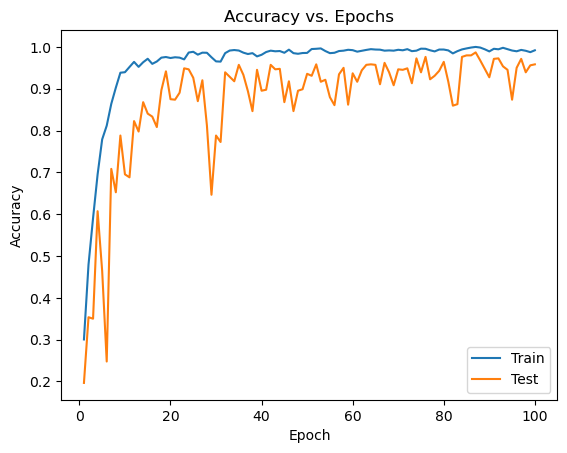

In [6]:
# Train the model
history = model.fit([X_train, X_train], y_train, batch_size=32, epochs=100, validation_data=([X_test, X_test], y_test))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test, X_test])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


In [8]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout
import numpy as np

input_shape = (256, 256, 3)

# Define the model architecture
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

concatenated_input = Concatenate()([x1, x2])

x3 = Conv2D(128, (3, 3), activation='elu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)
# New Convolutional Layer
x4 = Conv2D(128, (3,3), activation='elu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

x5 = Conv2D(256, (3,3), activation='elu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)

x6 = Conv2D(256, (3,3), activation='elu', padding='same')(x5)
x6 = BatchNormalization()(x6)
x6 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x6)

x7 = Conv2D(512, (3,3), activation='elu', padding='same')(x6)
x7 = BatchNormalization()(x7)
x7 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x7)
flatten_layer = Flatten()(x7)
x = Dense(128, activation='elu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Original model
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_11 (Conv2D)          (None, 128, 128, 32)         896       ['input_5[0][0]']             
                                                                                                  
 conv2d_12 (Conv2D)          (None, 128, 128, 64)         1792      ['input_6[0][0]']             
                                                                                            

Epoch 1/100
105/105 [==============================] - 60s 485ms/step - loss: 2.0990 - accuracy: 0.2995 - val_loss: 7.7511 - val_accuracy: 0.1500
Epoch 2/100
105/105 [==============================] - 51s 485ms/step - loss: 1.5243 - accuracy: 0.4505 - val_loss: 1.7234 - val_accuracy: 0.4071
Epoch 3/100
105/105 [==============================] - 65s 619ms/step - loss: 1.2246 - accuracy: 0.5578 - val_loss: 3.4546 - val_accuracy: 0.2262
Epoch 4/100
105/105 [==============================] - 71s 679ms/step - loss: 0.9862 - accuracy: 0.6400 - val_loss: 2.4711 - val_accuracy: 0.3917
Epoch 5/100
105/105 [==============================] - 65s 617ms/step - loss: 0.7753 - accuracy: 0.7232 - val_loss: 1.4634 - val_accuracy: 0.5488
Epoch 6/100
105/105 [==============================] - 71s 677ms/step - loss: 0.5285 - accuracy: 0.8212 - val_loss: 1.7087 - val_accuracy: 0.5369
Epoch 7/100
105/105 [==============================] - 63s 604ms/step - loss: 0.4462 - accuracy: 0.8459 - val_loss: 0.9674 -

C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: C:\Users\adwit\Downloads\cnn_models\test02spectro7elu.h5


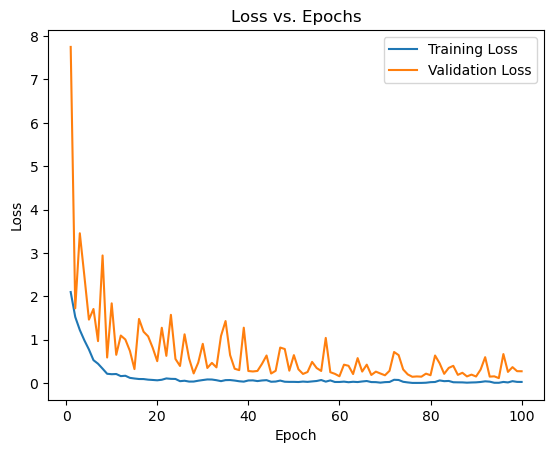

27/27 [==============================] - 5s 186ms/step
Accuracy: 0.9392857142857143
Average Precision: 0.9447194773988425
Average Recall: 0.9392857142857143
Average F1-score: 0.9394904949588934


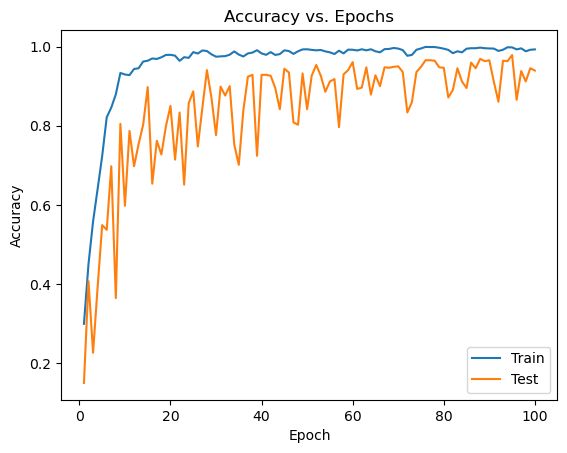

In [9]:
# Train the model
history = model.fit([X_train,X_train], y_train, epochs=100, batch_size=32, validation_data=([X_test,X_test], y_test))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02spectro7elu.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
# Extract loss values from history
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs. epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test,X_test])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()



In [10]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout

input_shape = (256,256, 3)

# First Input and Convolutional Block
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

# Second Input and Convolutional Block
input_layer2 = Input(shape=input_shape)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

# Concatenation
concatenated_input = Concatenate()([x1, x2])

# Third Convolutional Block
x3 = Conv2D(256, (3, 3), activation='relu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

# Flatten and Dense Layers
flatten_layer = Flatten()(x3)
x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# Output layer
num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Model definition and compilation
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_18 (Conv2D)          (None, 128, 128, 32)         896       ['input_7[0][0]']             
                                                                                                  
 conv2d_19 (Conv2D)          (None, 128, 128, 128)        3584      ['input_8[0][0]']             
                                                                                            

Epoch 1/100
105/105 [==============================] - 140s 1s/step - loss: 1.9086 - accuracy: 0.3632 - val_loss: 13.2998 - val_accuracy: 0.1702
Epoch 2/100
105/105 [==============================] - 170s 2s/step - loss: 1.0910 - accuracy: 0.6168 - val_loss: 1.4425 - val_accuracy: 0.5286
Epoch 3/100
105/105 [==============================] - 273s 3s/step - loss: 0.5878 - accuracy: 0.7941 - val_loss: 1.4267 - val_accuracy: 0.5155
Epoch 4/100
105/105 [==============================] - 177s 2s/step - loss: 0.3348 - accuracy: 0.8906 - val_loss: 2.4809 - val_accuracy: 0.4381
Epoch 5/100
105/105 [==============================] - 138s 1s/step - loss: 0.1692 - accuracy: 0.9464 - val_loss: 0.7589 - val_accuracy: 0.7536
Epoch 6/100
105/105 [==============================] - 122s 1s/step - loss: 0.1211 - accuracy: 0.9613 - val_loss: 0.3164 - val_accuracy: 0.8905
Epoch 7/100
105/105 [==============================] - 125s 1s/step - loss: 0.0875 - accuracy: 0.9735 - val_loss: 0.2253 - val_accuracy

C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: C:\Users\adwit\Downloads\cnn_models\test02spectrorelu.h5


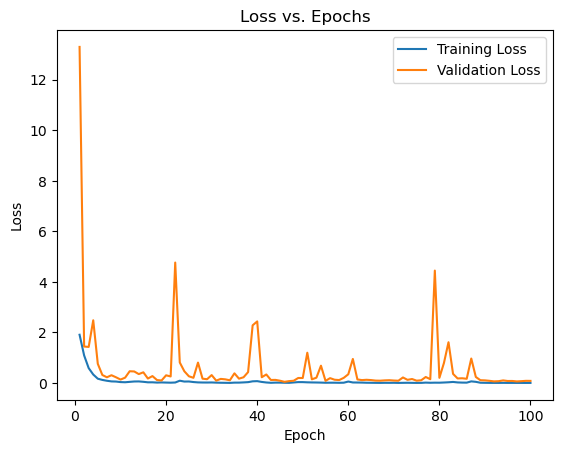

27/27 [==============================] - 9s 316ms/step
Accuracy: 0.9857142857142858
Average Precision: 0.9858747079466162
Average Recall: 0.9857142857142858
Average F1-score: 0.9856514057564852


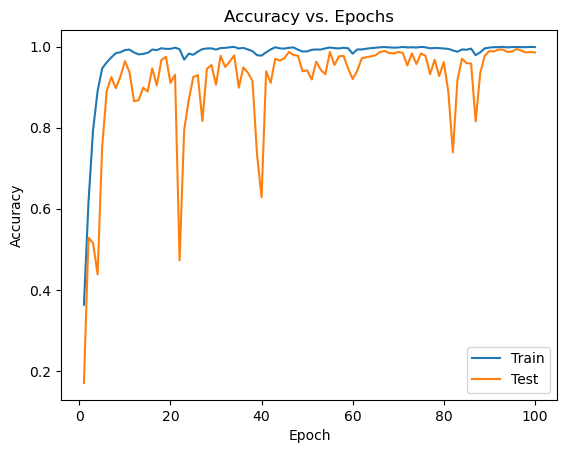

In [11]:
# Train the model
history = model.fit([X_train,X_train], y_train, epochs=100, batch_size=32, validation_data=([X_test,X_test], y_test))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02spectrorelu.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
# Extract loss values from history
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs. epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test,X_test])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()



In [2]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout

input_shape = (256,256, 3)

# First Input and Convolutional Block
input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

# Second Input and Convolutional Block
input_layer2 = Input(shape=input_shape)
x2 = Conv2D(128, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x2)

# Concatenation
concatenated_input = Concatenate()([x1, x2])

# Third Convolutional Block
x3 = Conv2D(256, (3, 3), activation='elu', padding='same')(concatenated_input)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

# Flatten and Dense Layers
flatten_layer = Flatten()(x3)
x = Dense(128, activation='elu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# Output layer
num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

# Model definition and compilation
model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 128)        3584      ['input_2[0][0]']             
                                                                                           

Epoch 1/100


105/105 [==============================] - 128s 1s/step - loss: 1.6694 - accuracy: 0.4413 - val_loss: 3.3956 - val_accuracy: 0.1857
Epoch 2/100
105/105 [==============================] - 147s 1s/step - loss: 0.8878 - accuracy: 0.6940 - val_loss: 2.4828 - val_accuracy: 0.4845
Epoch 3/100
105/105 [==============================] - 141s 1s/step - loss: 0.4437 - accuracy: 0.8451 - val_loss: 1.2484 - val_accuracy: 0.6476
Epoch 4/100
105/105 [==============================] - 161s 2s/step - loss: 0.2207 - accuracy: 0.9288 - val_loss: 0.8878 - val_accuracy: 0.7226
Epoch 5/100
105/105 [==============================] - 191s 2s/step - loss: 0.1840 - accuracy: 0.9413 - val_loss: 2.0007 - val_accuracy: 0.5726
Epoch 6/100
105/105 [==============================] - 288s 3s/step - loss: 0.1143 - accuracy: 0.9642 - val_loss: 1.9200 - val_accuracy: 0.5167
Epoch 7/100
105/105 [==============================] - 176s 2s/step - loss: 0.0727 - accuracy: 0.9732 - val_loss: 0.3791 - val_accurac

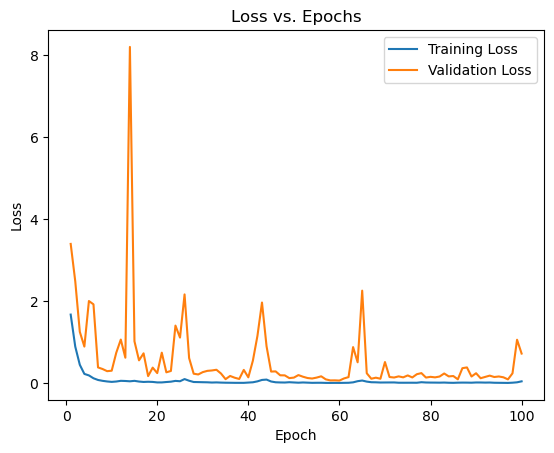

27/27 [==============================] - 11s 373ms/step
Accuracy: 0.9178571428571428
Average Precision: 0.9270954016988348
Average Recall: 0.9178571428571428
Average F1-score: 0.9190825813361904


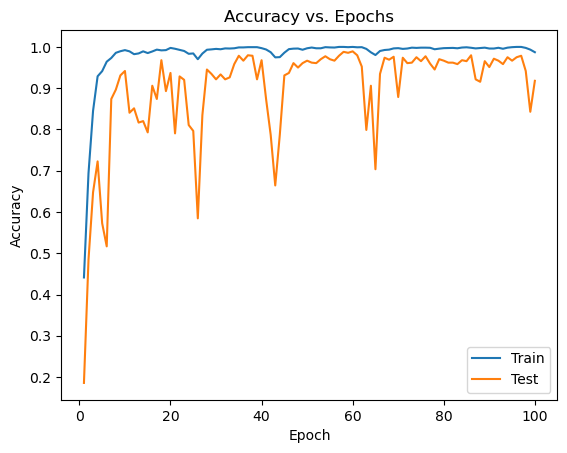

In [3]:
# Train the model
history = model.fit([X_train,X_train], y_train, epochs=100, batch_size=32, validation_data=([X_test,X_test], y_test))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'

# Extract loss values from history
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs. epochs
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test,X_test])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()



In [5]:
import os
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

chromagrams = []
labels = []

for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256, 256, 3))
            img_array = img_to_array(img)
            chromagrams.append(img_array)
            labels.append(emotion_category)

chromagrams = np.array(chromagrams)
labels = np.array(labels)

# Define the number of folds for k-fold cross-validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)


In [1]:
import os
import os
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\specti-newaug"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

# Define the number of folds for k-fold cross-validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)






Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 64)         1792      ['input_2[0][0]']             
                                                                                           

Fold 1/5
Epoch 1/30


105/105 [==============================] - 53s 467ms/step - loss: 2.0512 - accuracy: 0.3045 - val_loss: 5.4120 - val_accuracy: 0.1310
Epoch 2/30
105/105 [==============================] - 49s 470ms/step - loss: 1.4676 - accuracy: 0.4759 - val_loss: 1.6253 - val_accuracy: 0.4345
Epoch 3/30
105/105 [==============================] - 63s 597ms/step - loss: 1.0967 - accuracy: 0.6022 - val_loss: 2.2367 - val_accuracy: 0.3595
Epoch 4/30
105/105 [==============================] - 65s 621ms/step - loss: 0.8668 - accuracy: 0.6931 - val_loss: 1.0832 - val_accuracy: 0.6357
Epoch 5/30
105/105 [==============================] - 61s 584ms/step - loss: 0.5803 - accuracy: 0.7980 - val_loss: 1.1027 - val_accuracy: 0.6643
Epoch 6/30
105/105 [==============================] - 60s 573ms/step - loss: 0.4759 - accuracy: 0.8397 - val_loss: 1.4495 - val_accuracy: 0.6179
Epoch 7/30
105/105 [==============================] - 66s 630ms/step - loss: 0.2945 - accuracy: 0.9011 - val_loss: 0.90

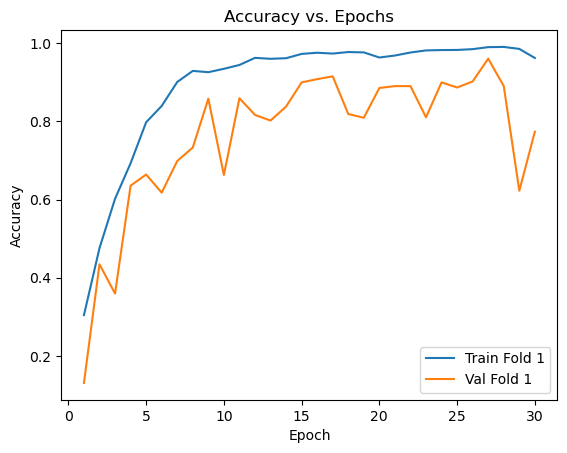

Fold 2/5
Epoch 1/30
105/105 [==============================] - 79s 727ms/step - loss: 0.1549 - accuracy: 0.9541 - val_loss: 0.2279 - val_accuracy: 0.9213
Epoch 2/30
105/105 [==============================] - 67s 639ms/step - loss: 0.0828 - accuracy: 0.9714 - val_loss: 0.2396 - val_accuracy: 0.9190
Epoch 3/30
105/105 [==============================] - 61s 580ms/step - loss: 0.0633 - accuracy: 0.9789 - val_loss: 0.0596 - val_accuracy: 0.9845
Epoch 4/30
105/105 [==============================] - 57s 539ms/step - loss: 0.0503 - accuracy: 0.9845 - val_loss: 0.1152 - val_accuracy: 0.9666
Epoch 5/30
105/105 [==============================] - 55s 527ms/step - loss: 0.0317 - accuracy: 0.9908 - val_loss: 0.0488 - val_accuracy: 0.9845
Epoch 6/30
105/105 [==============================] - 53s 508ms/step - loss: 0.0311 - accuracy: 0.9890 - val_loss: 0.2344 - val_accuracy: 0.9285
Epoch 7/30
105/105 [==============================] - 52s 499ms/step - loss: 0.0411 - accuracy: 0.9854 - val_loss: 0.2153

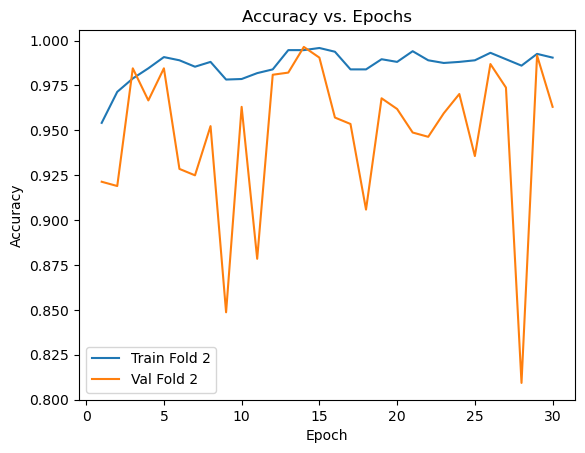

Fold 3/5
Epoch 1/30
105/105 [==============================] - 82s 739ms/step - loss: 0.0619 - accuracy: 0.9806 - val_loss: 1.1859 - val_accuracy: 0.7676
Epoch 2/30
105/105 [==============================] - 70s 669ms/step - loss: 0.0595 - accuracy: 0.9794 - val_loss: 0.0848 - val_accuracy: 0.9774
Epoch 3/30
105/105 [==============================] - 67s 642ms/step - loss: 0.0530 - accuracy: 0.9815 - val_loss: 0.6710 - val_accuracy: 0.8510
Epoch 4/30
105/105 [==============================] - 59s 561ms/step - loss: 0.0378 - accuracy: 0.9875 - val_loss: 0.0283 - val_accuracy: 0.9905
Epoch 5/30
105/105 [==============================] - 60s 575ms/step - loss: 0.0207 - accuracy: 0.9949 - val_loss: 0.0082 - val_accuracy: 0.9964
Epoch 6/30
105/105 [==============================] - 60s 569ms/step - loss: 0.0303 - accuracy: 0.9914 - val_loss: 0.0676 - val_accuracy: 0.9797
Epoch 7/30
105/105 [==============================] - 58s 551ms/step - loss: 0.0273 - accuracy: 0.9890 - val_loss: 0.0458

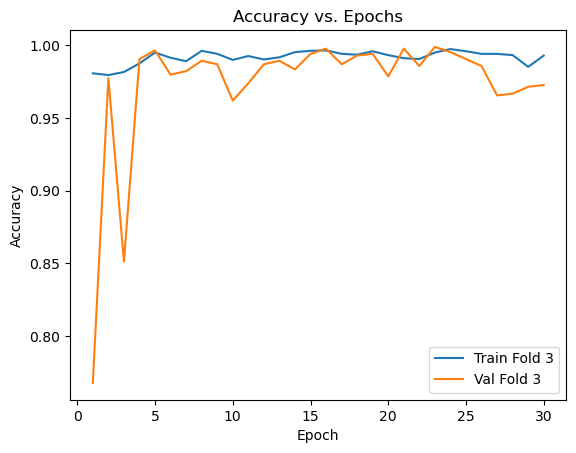

Fold 4/5
Epoch 1/30
105/105 [==============================] - 86s 754ms/step - loss: 0.0294 - accuracy: 0.9923 - val_loss: 0.0064 - val_accuracy: 0.9976
Epoch 2/30
105/105 [==============================] - 68s 647ms/step - loss: 0.0243 - accuracy: 0.9923 - val_loss: 0.0152 - val_accuracy: 0.9928
Epoch 3/30
105/105 [==============================] - 64s 606ms/step - loss: 0.0131 - accuracy: 0.9967 - val_loss: 0.0040 - val_accuracy: 0.9988
Epoch 4/30
105/105 [==============================] - 60s 573ms/step - loss: 0.0091 - accuracy: 0.9976 - val_loss: 0.0352 - val_accuracy: 0.9869
Epoch 5/30
105/105 [==============================] - 60s 573ms/step - loss: 0.0065 - accuracy: 0.9988 - val_loss: 0.0191 - val_accuracy: 0.9917
Epoch 6/30
105/105 [==============================] - 58s 556ms/step - loss: 0.0166 - accuracy: 0.9961 - val_loss: 0.0104 - val_accuracy: 0.9952
Epoch 7/30
105/105 [==============================] - 57s 545ms/step - loss: 0.0094 - accuracy: 0.9973 - val_loss: 0.0140

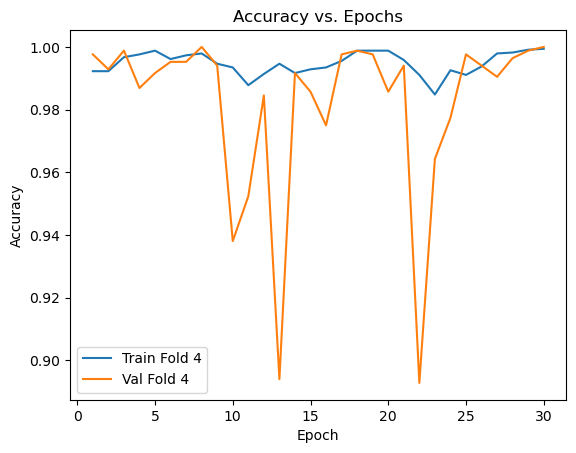

Fold 5/5
Epoch 1/30
105/105 [==============================] - 73s 675ms/step - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.0024 - val_accuracy: 0.9988
Epoch 2/30
105/105 [==============================] - 61s 578ms/step - loss: 0.0101 - accuracy: 0.9976 - val_loss: 0.0069 - val_accuracy: 0.9988
Epoch 3/30
105/105 [==============================] - 60s 569ms/step - loss: 0.0062 - accuracy: 0.9985 - val_loss: 0.0057 - val_accuracy: 0.9976
Epoch 4/30
105/105 [==============================] - 63s 596ms/step - loss: 0.0418 - accuracy: 0.9893 - val_loss: 0.3657 - val_accuracy: 0.9166
Epoch 5/30
105/105 [==============================] - 59s 563ms/step - loss: 0.0263 - accuracy: 0.9917 - val_loss: 0.0366 - val_accuracy: 0.9905
Epoch 6/30
105/105 [==============================] - 57s 547ms/step - loss: 0.0433 - accuracy: 0.9878 - val_loss: 0.0175 - val_accuracy: 0.9928
Epoch 7/30
105/105 [==============================] - 56s 539ms/step - loss: 0.0266 - accuracy: 0.9929 - val_loss: 0.1078

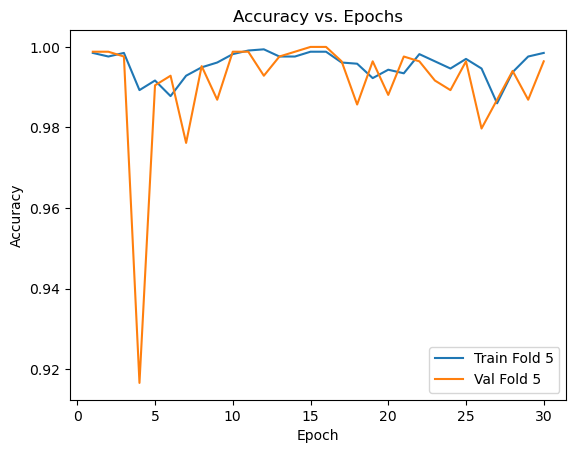

Average accuracy across all folds: 0.941174304485321


C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: C:\Users\adwit\Downloads\cnn_models\test02spectrokfold5.h5


In [3]:
# Perform k-fold cross-validation
fold_accuracies = []

for fold, (train_indices, val_indices) in enumerate(skf.split(spectrograms, labels)):
    print(f'Fold {fold + 1}/{num_folds}')
    X_train, X_val = spectrograms[train_indices], spectrograms[val_indices]
    y_train, y_val = labels_encoded[train_indices], labels_encoded[val_indices]
    
    history = model.fit([X_train,X_train], y_train, batch_size=32, epochs=30, validation_data=([X_val,X_val], y_val), verbose=1)
    
    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate([X_val,X_val], y_val, verbose=0)
    fold_accuracies.append(val_accuracy)

    # Plot accuracy vs. epochs for each fold
    plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label=f'Train Fold {fold + 1}')
    plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label=f'Val Fold {fold + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epochs')
    plt.legend()
    plt.show()

# Print average accuracy across all folds
print(f'Average accuracy across all folds: {np.mean(fold_accuracies)}')

# Save the trained model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02spectrokfold5.h5"
model.save(model_path)
print("Model saved successfully at:", model_path)

Fold 1/5
Epoch 1/60
105/105 [==============================] - 45s 395ms/step - loss: 0.0109 - accuracy: 0.9970 - val_loss: 0.0011 - val_accuracy: 0.9988
Epoch 2/60
105/105 [==============================] - 48s 458ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 1.0442e-04 - val_accuracy: 1.0000
Epoch 3/60
105/105 [==============================] - 52s 491ms/step - loss: 0.0052 - accuracy: 0.9982 - val_loss: 0.0063 - val_accuracy: 0.9988
Epoch 4/60
105/105 [==============================] - 54s 511ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0019 - val_accuracy: 0.9988
Epoch 5/60
105/105 [==============================] - 54s 519ms/step - loss: 0.0089 - accuracy: 0.9979 - val_loss: 0.0080 - val_accuracy: 0.9952
Epoch 6/60
105/105 [==============================] - 53s 508ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 0.0054 - val_accuracy: 0.9988
Epoch 7/60
105/105 [==============================] - 51s 482ms/step - loss: 0.0067 - accuracy: 0.9973 - val_loss: 0.

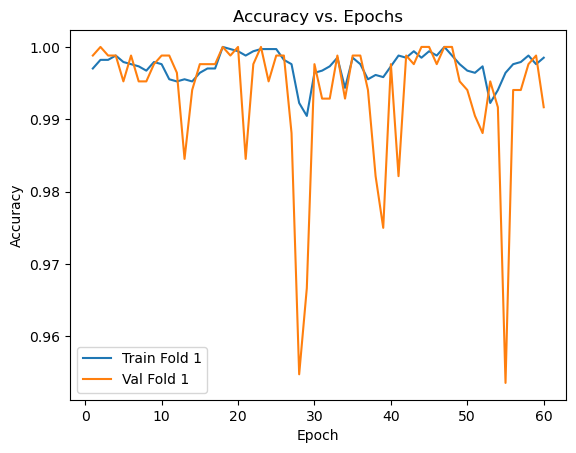

Fold 2/5
Epoch 1/60
105/105 [==============================] - 68s 633ms/step - loss: 0.0073 - accuracy: 0.9982 - val_loss: 1.8833e-04 - val_accuracy: 1.0000
Epoch 2/60
105/105 [==============================] - 58s 550ms/step - loss: 0.0034 - accuracy: 0.9982 - val_loss: 2.4435e-04 - val_accuracy: 1.0000
Epoch 3/60
105/105 [==============================] - 58s 552ms/step - loss: 0.0087 - accuracy: 0.9985 - val_loss: 3.8285e-04 - val_accuracy: 1.0000
Epoch 4/60
105/105 [==============================] - 55s 521ms/step - loss: 0.0097 - accuracy: 0.9985 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 5/60
105/105 [==============================] - 53s 506ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0023 - val_accuracy: 0.9988
Epoch 6/60
105/105 [==============================] - 56s 536ms/step - loss: 0.0041 - accuracy: 0.9991 - val_loss: 2.0253e-04 - val_accuracy: 1.0000
Epoch 7/60
105/105 [==============================] - 54s 515ms/step - loss: 0.0347 - accuracy: 0.9899 - 

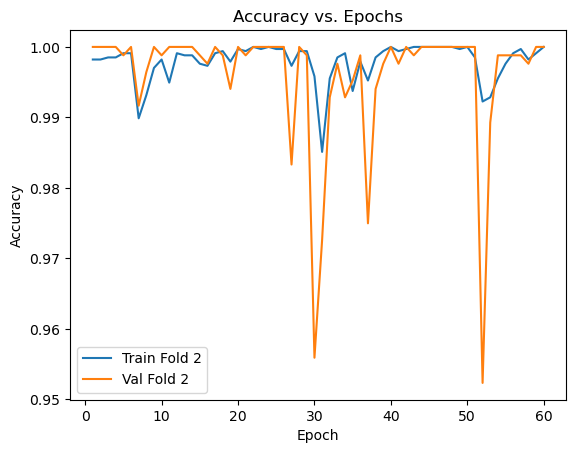

Fold 3/5
Epoch 1/60
105/105 [==============================] - 96s 876ms/step - loss: 0.0168 - accuracy: 0.9961 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 2/60
105/105 [==============================] - 161s 2s/step - loss: 0.0091 - accuracy: 0.9973 - val_loss: 0.0179 - val_accuracy: 0.9952
Epoch 3/60
105/105 [==============================] - 221s 2s/step - loss: 0.0158 - accuracy: 0.9964 - val_loss: 0.0090 - val_accuracy: 0.9976
Epoch 4/60
105/105 [==============================] - 160s 2s/step - loss: 0.0032 - accuracy: 0.9988 - val_loss: 3.2043e-04 - val_accuracy: 1.0000
Epoch 5/60
105/105 [==============================] - 185s 2s/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 1.7839e-04 - val_accuracy: 1.0000
Epoch 6/60
105/105 [==============================] - 161s 2s/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 3.3080e-05 - val_accuracy: 1.0000
Epoch 7/60
105/105 [==============================] - 153s 1s/step - loss: 0.0053 - accuracy: 0.9976 - val_loss: 1.1119

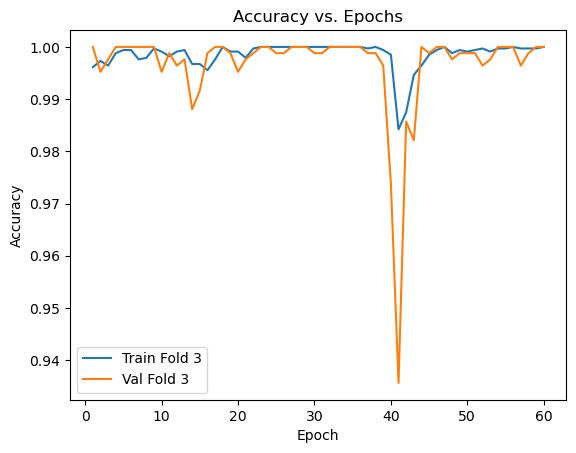

Fold 4/5
Epoch 1/60
105/105 [==============================] - 85s 782ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0174 - val_accuracy: 0.9988
Epoch 2/60
105/105 [==============================] - 66s 625ms/step - loss: 0.0078 - accuracy: 0.9982 - val_loss: 0.0084 - val_accuracy: 0.9964
Epoch 3/60
105/105 [==============================] - 63s 603ms/step - loss: 0.0168 - accuracy: 0.9946 - val_loss: 0.0698 - val_accuracy: 0.9797
Epoch 4/60
105/105 [==============================] - 72s 683ms/step - loss: 0.0273 - accuracy: 0.9923 - val_loss: 0.0465 - val_accuracy: 0.9893
Epoch 5/60
105/105 [==============================] - 58s 557ms/step - loss: 0.0100 - accuracy: 0.9970 - val_loss: 0.0104 - val_accuracy: 0.9976
Epoch 6/60
105/105 [==============================] - 63s 604ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0108 - val_accuracy: 0.9988
Epoch 7/60
105/105 [==============================] - 59s 565ms/step - loss: 0.0030 - accuracy: 0.9988 - val_loss: 0.0070

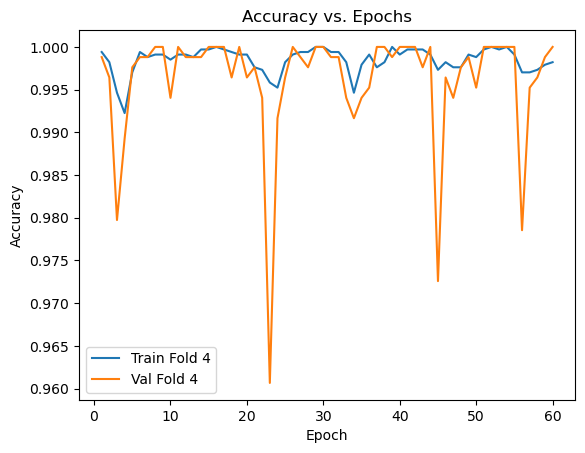

Fold 5/5
Epoch 1/60
105/105 [==============================] - 88s 725ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 1.8050e-05 - val_accuracy: 1.0000
Epoch 2/60
105/105 [==============================] - 76s 725ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 2.6567e-05 - val_accuracy: 1.0000
Epoch 3/60
105/105 [==============================] - 73s 698ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0054 - val_accuracy: 0.9988
Epoch 4/60
105/105 [==============================] - 63s 599ms/step - loss: 0.0075 - accuracy: 0.9982 - val_loss: 0.0810 - val_accuracy: 0.9809
Epoch 5/60
105/105 [==============================] - 60s 574ms/step - loss: 0.0074 - accuracy: 0.9988 - val_loss: 0.0057 - val_accuracy: 0.9976
Epoch 6/60
105/105 [==============================] - 60s 568ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 5.5979e-04 - val_accuracy: 1.0000
Epoch 7/60
105/105 [==============================] - 60s 575ms/step - loss: 6.9189e-04 - accuracy: 1.0000 - 

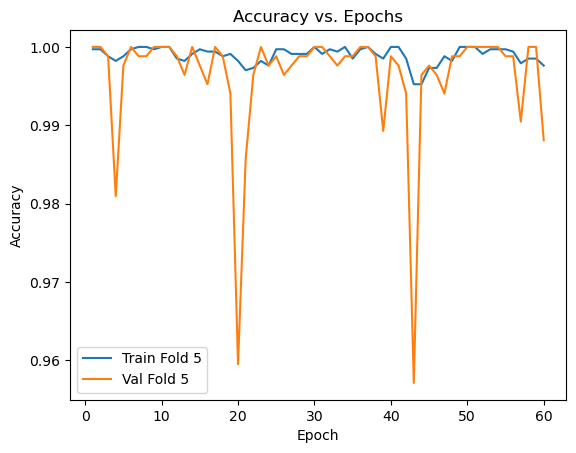

Average accuracy across all folds: 0.9959495425224304


In [4]:
# Perform k-fold cross-validation
fold_accuracies = []

for fold, (train_indices, val_indices) in enumerate(skf.split(spectrograms, labels)):
    print(f'Fold {fold + 1}/{num_folds}')
    X_train, X_val = spectrograms[train_indices], spectrograms[val_indices]
    y_train, y_val = labels_encoded[train_indices], labels_encoded[val_indices]
    
    history = model.fit([X_train,X_train], y_train, batch_size=32, epochs=60, validation_data=([X_val,X_val], y_val), verbose=1)
    
    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate([X_val,X_val], y_val, verbose=0)
    fold_accuracies.append(val_accuracy)

    # Plot accuracy vs. epochs for each fold
    plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label=f'Train Fold {fold + 1}')
    plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label=f'Val Fold {fold + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epochs')
    plt.legend()
    plt.show()

# Print average accuracy across all folds
print(f'Average accuracy across all folds: {np.mean(fold_accuracies)}')



In [1]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feas256.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_feas256.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_labels256.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.1, random_state=42)



In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten
from tensorflow.keras import regularizers

# Define and compile the model
model = Sequential([
    Flatten(input_shape=(10,5,512)),  # Flatten layer to convert 3D input to 1D
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),  
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.4),
    BatchNormalization(),
    Dense(8, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 1/200


118/118 [==============================] - 5s 18ms/step - loss: 13.6008 - accuracy: 0.2458 - val_loss: 17.6306 - val_accuracy: 0.0952
Epoch 2/200
118/118 [==============================] - 2s 15ms/step - loss: 10.7325 - accuracy: 0.4568 - val_loss: 11.0693 - val_accuracy: 0.1333
Epoch 3/200
118/118 [==============================] - 2s 15ms/step - loss: 8.3914 - accuracy: 0.6578 - val_loss: 10.2530 - val_accuracy: 0.1762
Epoch 4/200
118/118 [==============================] - 2s 16ms/step - loss: 6.6327 - accuracy: 0.7786 - val_loss: 18.2042 - val_accuracy: 0.2238
Epoch 5/200
118/118 [==============================] - 2s 17ms/step - loss: 5.4670 - accuracy: 0.8091 - val_loss: 6.6643 - val_accuracy: 0.3262
Epoch 6/200
118/118 [==============================] - 3s 24ms/step - loss: 4.5308 - accuracy: 0.8231 - val_loss: 23.6042 - val_accuracy: 0.1238
Epoch 7/200
118/118 [==============================] - 3s 28ms/step - loss: 3.8358 - accuracy: 0.8408 - val_loss: 11.4284 - val

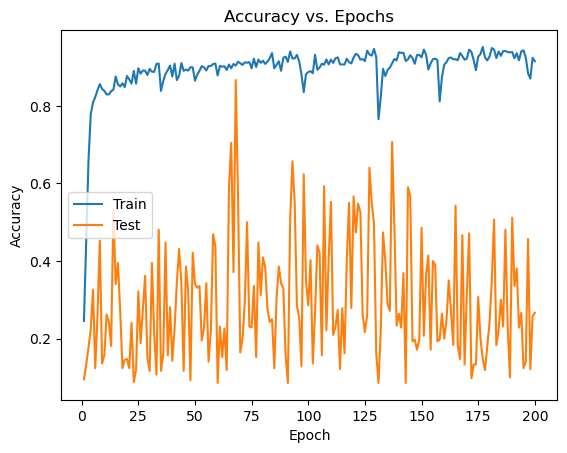

In [3]:
# Train the model
history = model.fit(X_train_co, y_train_co, batch_size=32, epochs=200, validation_data=(X_test_co, y_test_co))
from tensorflow.keras.models import save_model


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict(X_test_co)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_co, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split


import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# Load extracted features from spectrograms and chromagrams
spectrogram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\spectrograms_feasnewest224.npy")
chromagram_features = np.load(r"C:\Users\adwit\Downloads\combined_features\chromaograms_feasnewest224.npy")

# Concatenate the features
concatenated_features = np.concatenate((spectrogram_features, chromagram_features), axis=1)

# Load the labels
labels = np.load(r"C:\Users\adwit\Downloads\combined_features\chromagrams_labelsnewest224.npy")

label_binarizer = LabelBinarizer()
labels_encoded = label_binarizer.fit_transform(labels)
# Split the data into training and testing sets
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(concatenated_features, labels_encoded, test_size=0.1, random_state=42)



In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\specti-newaug"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(150,150,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

X_train_s1, X_test_s1, y_train_s1, y_test_s1 = train_test_split(spectrograms, labels, test_size=0.1, random_state=42)
label_binarizer = LabelBinarizer()
y_train_s1 = label_binarizer.fit_transform(y_train_s1)
y_test_s1 = label_binarizer.transform(y_test_s1)



In [2]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout

input_shape = (150,150, 3)  

input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='relu', strides=(2, 2), padding='valid')(input_layer1)  # Stride added here
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2), strides=(3, 3))(x1)  # Stride added here

input_layer2 = Input(shape=input_shape)
x2 = Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='valid')(input_layer2)  # Stride added here
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2), strides=(3, 3))(x2)  # Stride added here

concatenated_input = Concatenate()([x1, x2])

flatten_layer = Flatten()(concatenated_input)

x = Dense(128, activation='relu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Output layer
num_classes = 8
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 74, 74, 64)           1792      ['input_2[0][0]']             
                                                                                           

In [3]:
# Train the model
# Train the model
model.fit([X_train_s1, X_train_s1], y_train_s1, batch_size=32, epochs=200, validation_data=([X_test_s1, X_test_s1], y_test_s1))


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_train_s1, X_train_s1])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_s1, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_s1, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_s1, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_s1, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


Epoch 1/200


118/118 [==============================] - 16s 77ms/step - loss: 2.4468 - accuracy: 0.2632 - val_loss: 1.8330 - val_accuracy: 0.3714
Epoch 2/200
118/118 [==============================] - 7s 60ms/step - loss: 1.5432 - accuracy: 0.4666 - val_loss: 1.1957 - val_accuracy: 0.5714
Epoch 3/200
118/118 [==============================] - 7s 60ms/step - loss: 0.9504 - accuracy: 0.6753 - val_loss: 0.9891 - val_accuracy: 0.6310
Epoch 4/200
118/118 [==============================] - 7s 61ms/step - loss: 0.5101 - accuracy: 0.8321 - val_loss: 0.5597 - val_accuracy: 0.8048
Epoch 5/200
118/118 [==============================] - 7s 62ms/step - loss: 0.2752 - accuracy: 0.9126 - val_loss: 0.2669 - val_accuracy: 0.9214
Epoch 6/200
118/118 [==============================] - 7s 63ms/step - loss: 0.1818 - accuracy: 0.9481 - val_loss: 0.3091 - val_accuracy: 0.8952
Epoch 7/200
118/118 [==============================] - 7s 63ms/step - loss: 0.1490 - accuracy: 0.9552 - val_loss: 0.1336 - val_accura

ValueError: Found input variables with inconsistent numbers of samples: [420, 3776]

In [6]:
# Train the model
history = model.fit([X_train, X_train], y_train, batch_size=32, epochs=200, validation_data=([X_test, X_test], y_test))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)

# Define the path where you want to save the model
model_path = r"C:\Users\adwit\Downloads\cnn_models\test02scamcomplex.h5"  # Change the path as needed

# Save the trained model
model.save(model_path)

print("Model saved successfully at:", model_path)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = model.predict([X_test, X_test])  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


Epoch 1/200
105/105 [==============================] - 103s 670ms/step - loss: 1.9918 - accuracy: 0.3328 - val_loss: 4.7570 - val_accuracy: 0.1607
Epoch 2/200
105/105 [==============================] - 58s 554ms/step - loss: 1.1513 - accuracy: 0.5885 - val_loss: 3.4669 - val_accuracy: 0.2119
Epoch 3/200
105/105 [==============================] - 83s 796ms/step - loss: 0.5637 - accuracy: 0.8084 - val_loss: 1.4299 - val_accuracy: 0.5595
Epoch 4/200
105/105 [==============================] - 81s 773ms/step - loss: 0.3190 - accuracy: 0.8906 - val_loss: 1.3614 - val_accuracy: 0.6048
Epoch 5/200
105/105 [==============================] - 76s 723ms/step - loss: 0.1906 - accuracy: 0.9416 - val_loss: 0.2805 - val_accuracy: 0.9167
Epoch 6/200
105/105 [==============================] - 68s 652ms/step - loss: 0.1364 - accuracy: 0.9574 - val_loss: 0.4962 - val_accuracy: 0.8571
Epoch 7/200
105/105 [==============================] - 69s 655ms/step - loss: 0.1011 - accuracy: 0.9672 - val_loss: 0.3615 

AbortedError: Graph execution error:

Detected at node gradient_tape/model_1/conv2d_5/Conv2D/Conv2DBackpropFilter defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\adwit\AppData\Local\Temp\ipykernel_23572\38161729.py", line 2, in <module>

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\engine\training.py", line 1154, in train_step

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\optimizers\optimizer.py", line 543, in minimize

  File "C:\Users\adwit\anaconda3\anaconda33\Lib\site-packages\keras\src\optimizers\optimizer.py", line 276, in compute_gradients

Operation received an exception:Status: 1, message: could not create a primitive, in file tensorflow/core/kernels/mkl/mkl_conv_grad_filter_ops.cc:685
	 [[{{node gradient_tape/model_1/conv2d_5/Conv2D/Conv2DBackpropFilter}}]] [Op:__inference_train_function_121871]

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
dataset_dir = r"C:\Users\adwit\Downloads\specti-newaug"

spectrograms = []
labels = []
for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            spectrograms.append(img_array)
            labels.append(emotion_category)
spectrograms = np.array(spectrograms)
labels = np.array(labels)

X_train_s1, X_test_s1, y_train_s1, y_test_s1 = train_test_split(spectrograms, labels, test_size=0.2, random_state=42)
label_binarizer = LabelBinarizer()
y_train_s1 = label_binarizer.fit_transform(y_train_s1)
y_test_s1 = label_binarizer.transform(y_test_s1)



In [5]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout

input_shape = (256,256, 3) 



input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

x3 = Conv2D(128, (3, 3), activation='elu', padding='same')(x1)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

x4 = Conv2D(128, (3, 3), activation='elu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

x5 = Conv2D(256, (3,3), activation='elu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)

flatten_layer = Flatten()(x5)
x = Dense(128, activation='elu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

output_layer = Dense(8, activation='softmax')(x)

# Modified model using only input_layer1
modified_model = Model(inputs=input_layer1, outputs=output_layer)
modified_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modified_model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_24 (Ba  (None, 128, 128, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 42, 42, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 42, 42, 128)       36992     
                                                                 
 batch_normalization_25 (Ba  (None, 42, 42, 128)       512 

In [7]:
# Train the model
history = modified_model.fit(X_train_s1, y_train_s1, batch_size=32, epochs=100, validation_data=(X_test_s1, y_test_s1))
from tensorflow.keras.models import save_model

# Assuming you have trained your CNN model and it's stored in a variable called 'model'
# model = ... (your CNN model)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = modified_model.predict(X_test_s1)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_s1, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


Epoch 1/100


105/105 [==============================] - 25s 198ms/step - loss: 1.9789 - accuracy: 0.3346 - val_loss: 2.7105 - val_accuracy: 0.2702
Epoch 2/100
105/105 [==============================] - 20s 187ms/step - loss: 1.3215 - accuracy: 0.5328 - val_loss: 1.6841 - val_accuracy: 0.4405
Epoch 3/100
105/105 [==============================] - 20s 187ms/step - loss: 0.9229 - accuracy: 0.6710 - val_loss: 2.1464 - val_accuracy: 0.3679
Epoch 4/100
105/105 [==============================] - 22s 213ms/step - loss: 0.5974 - accuracy: 0.7938 - val_loss: 0.6984 - val_accuracy: 0.7452
Epoch 5/100
105/105 [==============================] - 25s 236ms/step - loss: 0.3891 - accuracy: 0.8567 - val_loss: 1.8339 - val_accuracy: 0.5321
Epoch 6/100
105/105 [==============================] - 28s 266ms/step - loss: 0.2736 - accuracy: 0.9088 - val_loss: 0.4791 - val_accuracy: 0.8488
Epoch 7/100
105/105 [==============================] - 27s 259ms/step - loss: 0.2081 - accuracy: 0.9282 - val_loss: 1.4670

NameError: name 'y_test' is not defined

27/27 [==============================] - 1s 48ms/step
Accuracy: 0.9476190476190476
Average Precision: 0.95019139152088
Average Recall: 0.9476190476190476
Average F1-score: 0.9465039634959009


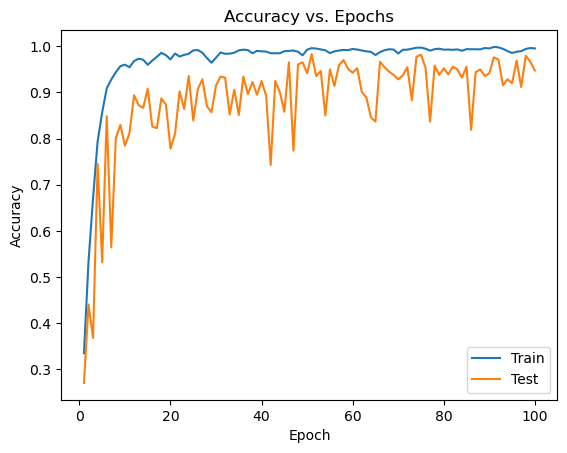

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = modified_model.predict(X_test_s1)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_s1, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test_s1, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test_s1, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test_s1, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()


In [10]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

dataset_dir = r"C:\Users\adwit\Downloads\chroma-augm"

chromagrams = []
labels = []

for emotion_category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, emotion_category)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img = load_img(os.path.join(category_dir, filename), target_size=(256,256,3))
            img_array = img_to_array(img)
            chromagrams.append(img_array)
            labels.append(emotion_category)

chromagrams = np.array(chromagrams)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(chromagrams, labels, test_size=0.2, random_state=42)

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)



In [11]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, Input, BatchNormalization, Dropout

input_shape = (256,256, 3) 



input_layer1 = Input(shape=input_shape)
x1 = Conv2D(32, (3, 3), activation='elu', padding='same', strides=(2, 2))(input_layer1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(3, 3), strides=(3, 3))(x1)

x3 = Conv2D(128, (3, 3), activation='elu', padding='same')(x1)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x3)

x4 = Conv2D(128, (3, 3), activation='elu', padding='same')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x4)

x5 = Conv2D(256, (3,3), activation='elu', padding='same')(x4)
x5 = BatchNormalization()(x5)
x5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x5)

x6 = Conv2D(512, (3,3), activation='elu', padding='same')(x5)
x6 = BatchNormalization()(x6)
x6 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x6)

flatten_layer = Flatten()(x6)
x = Dense(128, activation='elu')(flatten_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(256, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='elu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

output_layer = Dense(8, activation='softmax')(x)

# Modified model using only input_layer1
modified_model = Model(inputs=input_layer1, outputs=output_layer)
modified_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modified_model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_16 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_32 (Ba  (None, 128, 128, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 42, 42, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 42, 42, 128)       36992     
                                                                 
 batch_normalization_33 (Ba  (None, 42, 42, 128)       512 

Epoch 1/100
105/105 [==============================] - 25s 201ms/step - loss: 1.9642 - accuracy: 0.3275 - val_loss: 6.1689 - val_accuracy: 0.2036
Epoch 2/100
105/105 [==============================] - 19s 180ms/step - loss: 1.1338 - accuracy: 0.5954 - val_loss: 1.5464 - val_accuracy: 0.5429
Epoch 3/100
105/105 [==============================] - 20s 195ms/step - loss: 0.6273 - accuracy: 0.7813 - val_loss: 1.0722 - val_accuracy: 0.6798
Epoch 4/100
105/105 [==============================] - 21s 201ms/step - loss: 0.3068 - accuracy: 0.8954 - val_loss: 0.7202 - val_accuracy: 0.7738
Epoch 5/100
105/105 [==============================] - 22s 207ms/step - loss: 0.1846 - accuracy: 0.9404 - val_loss: 0.3017 - val_accuracy: 0.9202
Epoch 6/100
105/105 [==============================] - 23s 215ms/step - loss: 0.0746 - accuracy: 0.9788 - val_loss: 0.2038 - val_accuracy: 0.9524
Epoch 7/100
105/105 [==============================] - 23s 224ms/step - loss: 0.0840 - accuracy: 0.9714 - val_loss: 0.3874 -

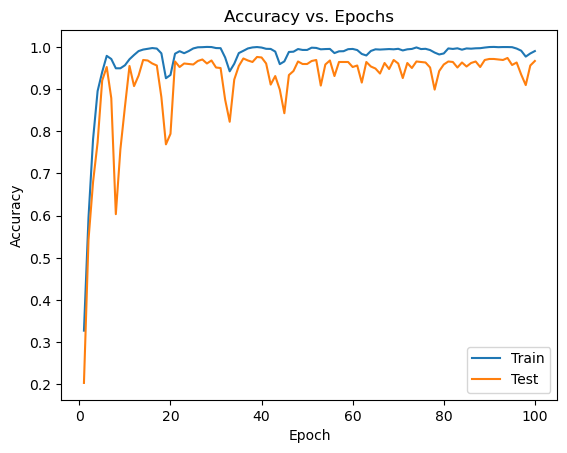

In [12]:



# Train the model
history = modified_model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your CNN model and obtained predictions
# Replace these lines with your actual prediction code
# model = ... (your CNN model)
y_pred = modified_model.predict(X_test)  # Example of getting predictions, adjust according to your model

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Calculate precision, recall, and F1-score
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='weighted')

print("Accuracy:", accuracy)
print("Average Precision:", precision)
print("Average Recall:", recall)
print("Average F1-score:", f1)
# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt

# Extract accuracy values from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot accuracy vs. epochs
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')              
plt.legend()
plt.show()
